# 1. Importing Libraries

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# import 'is_string_dtype' and 'is_numeric_dtype' to check the data type 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'SciPy' is used to perform scientific computations
from scipy.stats import shapiro
from scipy import stats

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# 2. Set Options

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# 3. Read Data

In [4]:
#Loading the training dataset
df = pd.read_csv('price_train.csv')

In [5]:
# Retrieving the first 5 rows of created dataframe
df.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [6]:
df.shape

(3466, 25)

In [7]:
df.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

# 4. Data Analysis and Preparation

##  4.1 Understanding and Correcting the Data

In [8]:
#Checking the shape of the data
df.shape

(3466, 25)

In [9]:
# Checking the columns
df.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [10]:
#Checking the data types of the features
df.dtypes

X1                                int64
id                                int64
host_is_superhost                  bool
host_response_rate               object
host_response_time               object
host_listings_count               int64
host_identity_verified             bool
accommodates                      int64
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
latitude                        float64
longitude                       float64
guests_included                   int64
bathrooms                       float64
bedrooms                          int64
beds                              int64
bed_type                         object
amenities                        object
cleaning_fee                     object
minimum_nights                    int64
maximum_nights                    int64
instant_bookable                   bool
cancellation_policy              object
price                            object


## 4.2 Checking No. of Unique Values in each Feature

This will help us to rectify in case any categorical or numerical feature in the dataset has been mistakenly considered as other type or not.

In [11]:
data_type_and_unique = pd.concat([df.dtypes, df.nunique()], axis = 1, keys = ['Data Types', 'Number of unique Values'])
data_type_and_unique

,Data Types,Number of unique Values
X1,int64,3466
id,int64,3466
host_is_superhost,bool,2
host_response_rate,object,32
host_response_time,object,4
host_listings_count,int64,61
host_identity_verified,bool,2
accommodates,int64,19
neighbourhood_group_cleansed,object,17
property_type,object,26


#### Now let us work on each feature individually.

## 4.3 Data Correction

The features 'X1' and 'id' are not that much important in creating our model. Hence these two columns can be dropped.

In [12]:
#df = df.drop(['X1','id'],inplace=True)
df.drop(['X1','id'], axis=1, inplace=True)

In [13]:
df.head()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [14]:
df.shape

(3466, 23)

In [253]:
df.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time',
       'host_listings_count', 'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'cancellation_policy', 'price'],
      dtype='object')

### 4.3.1 host_is_superhost

In [254]:
df['host_is_superhost'].unique()

array([False,  True])

In [255]:
df['host_is_superhost'].value_counts()

False    1762
True     1704
Name: host_is_superhost, dtype: int64

In [256]:
df['host_is_superhost'].dtype

dtype('bool')

In [257]:
#Converting to categorical
df['host_is_superhost'] = df['host_is_superhost'].astype("object")

### 4.3.2 host_response_rate

In [258]:
df['host_response_rate'].unique()

array(['99%', '100%', '90%', '75%', '86%', '92%', '70%', '98%', '67%',
       '91%', '84%', '0%', '80%', '56%', '85%', '50%', '57%', '71%',
       '93%', '97%', '95%', '96%', '88%', '78%', '40%', '94%', '83%',
       '89%', '33%', '60%', '87%', '62%'], dtype=object)

In [259]:
df['host_response_rate'].value_counts()

100%    2813
99%      318
92%       41
90%       39
98%       39
0%        26
97%       20
95%       18
96%       14
86%       14
50%       14
94%       13
80%       13
75%       12
67%       10
85%        8
93%        8
88%        8
83%        7
78%        5
70%        5
89%        5
56%        3
91%        3
60%        2
84%        2
71%        1
40%        1
62%        1
33%        1
57%        1
87%        1
Name: host_response_rate, dtype: int64

In [22]:
df['host_response_rate'].dtype

dtype('O')

#### Let us remove the '%' sign from the host_response_rate records, and convert its data type to float.

In [23]:
df['host_response_rate'] = df['host_response_rate'].str.replace("[%, ]", "").astype("float")

In [24]:
df['host_response_rate'].unique()

array([ 99., 100.,  90.,  75.,  86.,  92.,  70.,  98.,  67.,  91.,  84.,
         0.,  80.,  56.,  85.,  50.,  57.,  71.,  93.,  97.,  95.,  96.,
        88.,  78.,  40.,  94.,  83.,  89.,  33.,  60.,  87.,  62.])

In [25]:
df['host_response_rate'].value_counts()

100.0    2813
99.0      318
92.0       41
98.0       39
90.0       39
0.0        26
97.0       20
95.0       18
86.0       14
50.0       14
96.0       14
94.0       13
80.0       13
75.0       12
67.0       10
88.0        8
85.0        8
93.0        8
83.0        7
89.0        5
70.0        5
78.0        5
91.0        3
56.0        3
60.0        2
84.0        2
62.0        1
40.0        1
57.0        1
33.0        1
71.0        1
87.0        1
Name: host_response_rate, dtype: int64

In [26]:
df['host_response_rate'].dtype

dtype('float64')

Now the feature host_response_rate seems to be in correct format.

#### For easier understanding of this feature, let's convert it to a categorical feature called 'host_response_level'.

In [27]:
def host_response_level(val):
    if val<10:
        return 'Worst'
    elif val>11 and val<=30:
        return 'Bad'
    elif val>31 and val<=50:
        return 'Average'
    elif val>51 and val<=70:
        return 'Good'
    elif val>71 and val<=90:
        return 'Very Good'
    else:
        return 'Excellent'

In [28]:
df['host_response_level'] = df['host_response_rate'].apply(lambda x: host_response_level(x))

In [29]:
df['host_response_level'].value_counts()

Excellent    3288
Very Good     114
Worst          26
Good           22
Average        16
Name: host_response_level, dtype: int64

In [30]:
#df.drop(['host_response_rate'], axis=1, inplace=True)

In [31]:
#df.head()

### 4.3.3 host_response_time

In [32]:
df['host_response_time'].dtype

dtype('O')

In [33]:
df['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [34]:
df['host_response_time'].value_counts()

within an hour        2887
within a few hours     388
within a day           163
a few days or more      28
Name: host_response_time, dtype: int64

### 4.3.4 host_listings_count

In [35]:
df['host_listings_count'].dtype

dtype('int64')

In [36]:
df['host_listings_count'].nunique()

61

In [37]:
df['host_listings_count'].unique()

array([ 521,    1,    4,    9,    2,  152,    7,    8,    3,  131,    5,
         44,    6,   42,  100,  472,   20, 1276,  123, 1292,   32,   35,
         11,   19,   93,   81,   40,   14,   37,   60,  321, 1596,   50,
         61,    0,  647,   10,   15,   51,  786,   57,   84,   13,   18,
         17,   12,  220,   21,  209,  231,  302,   78,   31,  156,  106,
        120,   36,   26,   22,   47,  161], dtype=int64)

In [38]:
df['host_listings_count'].value_counts()

1       1252
2        536
3        284
4        166
521      157
5        114
131       70
152       69
123       64
9         58
7         56
8         53
6         50
57        36
100       30
1292      29
13        28
10        27
81        27
40        26
51        26
50        25
42        23
1276      23
11        20
35        20
14        19
32        16
15        14
20        12
84        12
1596      11
786       10
37        10
18         9
61         9
321        8
60         7
44         7
19         6
12         6
78         6
647        5
21         4
209        4
0          3
156        2
231        2
302        2
31         2
161        1
93         1
47         1
106        1
120        1
472        1
22         1
26         1
36         1
220        1
17         1
Name: host_listings_count, dtype: int64

In [39]:
def host_listings_times(val):
    if val==1:
        return 'Once'
    elif val==2:
        return 'Twice'
    elif val>2 and val<=10:
        return '3-10 Times'
    elif val>10 and val<=100:
        return '11-100 Times'
    elif val>100 and val<=500:
        return '101-500 Times'
    else:
        return 'More than 500 Times'   

In [40]:
df['host_listings_times'] = df['host_listings_count'].apply(lambda x: host_listings_times(x))

In [41]:
df['host_listings_times'].value_counts()

Once                   1252
3-10 Times              808
Twice                   536
11-100 Times            406
More than 500 Times     238
101-500 Times           226
Name: host_listings_times, dtype: int64

### 4.3.5 host_identity_verified

In [42]:
df['host_identity_verified'].dtype

dtype('bool')

In [43]:
df['host_identity_verified'].value_counts()

False    1871
True     1595
Name: host_identity_verified, dtype: int64

In [44]:
#Converting to categorical
df['host_identity_verified'] = df['host_identity_verified'].astype("object")

### 4.3.6 accommodates

In [45]:
df['accommodates'].dtype

dtype('int64')

In [46]:
df['accommodates'].nunique()

19

In [47]:
df['accommodates'].unique()

array([ 5,  2,  4,  8,  3,  6, 13, 14,  1,  9, 10, 23, 12,  7, 11, 16, 25,
       15, 28], dtype=int64)

In [48]:
df['accommodates'].value_counts()

2     1268
4      700
3      460
6      355
5      195
1      166
8      128
7       55
10      42
12      28
9       26
16      19
11       7
14       7
13       5
15       2
23       1
28       1
25       1
Name: accommodates, dtype: int64

In [49]:
def accommodate_no(val):
    if val==1:
        return 'Single Accommodation'
    elif val==2:
        return 'Double Accommodation'
    elif val>2 and val<=10:
        return '3-10 Accommodates'
    elif val>10 and val<=20:
        return '11-20 Accommodates'
    else:
        return 'More than 20 Accommodates'  

In [50]:
df['accommodate_no'] = df['accommodates'].apply(lambda x: accommodate_no(x))

In [51]:
df['accommodate_no'].value_counts()

3-10 Accommodates            1961
Double Accommodation         1268
Single Accommodation          166
11-20 Accommodates             68
More than 20 Accommodates       3
Name: accommodate_no, dtype: int64

In [52]:
df['accommodate_no'].dtype

dtype('O')

### 4.3.7 neighbourhood_group_cleansed

In [53]:
df['neighbourhood_group_cleansed'].dtype

dtype('O')

In [54]:
df['neighbourhood_group_cleansed'].nunique()

17

In [55]:
df['neighbourhood_group_cleansed'].unique()

array(['Downtown', 'Queen Anne', 'Rainier Valley', 'Central Area',
       'Beacon Hill', 'Magnolia', 'Other neighborhoods', 'Northgate',
       'Cascade', 'University District', 'West Seattle', 'Capitol Hill',
       'Lake City', 'Ballard', 'Delridge', 'Seward Park', 'Interbay'],
      dtype=object)

### 4.3.8 property_type

In [56]:
df['property_type'].dtype

dtype('O')

In [57]:
df['property_type'].nunique()

26

In [58]:
df['property_type'].unique()

array(['Apartment', 'House', 'Guest suite', 'Townhouse', 'Bungalow',
       'Condominium', 'Loft', 'Serviced apartment', 'Guesthouse',
       'Houseboat', 'Aparthotel', 'Bed and breakfast', 'Camper/RV',
       'Tiny house', 'Cabin', 'Boat', 'Cottage', 'Other', 'Farm stay',
       'Hostel', 'Tent', 'Resort', 'Yurt', 'In-law', 'Boutique hotel',
       'Villa'], dtype=object)

### 4.3.9 room_type

In [59]:
df['room_type'].dtype

dtype('O')

In [60]:
df['room_type'].nunique()

3

In [61]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

### 4.3.10 latitude

In [62]:
df['latitude'].dtype

dtype('float64')

In [63]:
df['latitude'].nunique()

3465

### 4.3.11 longitude

In [64]:
df['longitude'].dtype

dtype('float64')

In [65]:
df['longitude'].nunique()

3459

### 4.3.12 guests_included

In [66]:
df['guests_included'].dtype

dtype('int64')

In [67]:
df['guests_included'].nunique()

16

In [68]:
df['guests_included'].unique()

array([ 4,  1,  2,  6, 10, 12,  3, 16,  8, 11,  9,  5,  7, 15, 14, 13],
      dtype=int64)

In [69]:
df['guests_included'].value_counts()

1     1744
2     1035
4      321
6      144
3       89
8       41
5       35
10      16
7       14
12       9
9        5
14       5
16       4
13       2
15       1
11       1
Name: guests_included, dtype: int64

#### For easier understanding of this feature, let's convert it to a categorical feature called 'guests'.

In [70]:
def guests(val):
    if val==1:
        return 'Single Guest'
    elif val==2:
        return 'Double Guest'
    elif val>2 and val<=10:
        return '3-10 Guests'
    else:
        return 'More than 10 Guests' 

In [71]:
df['guests'] = df['guests_included'].apply(lambda x: guests(x))

In [72]:
df['guests'].value_counts()

Single Guest           1744
Double Guest           1035
3-10 Guests             665
More than 10 Guests      22
Name: guests, dtype: int64

### 4.3.13 bathrooms

In [73]:
df['bathrooms'].dtype

dtype('float64')

In [74]:
df['bathrooms'].nunique()

12

In [75]:
df['bathrooms'].unique()

array([2. , 1. , 2.5, 3.5, 1.5, 3. , 4. , 6. , 4.5, 0. , 0.5, 8. ])

Here we see the feature 'bathroom', which referes to the number of bathrooms is in float, and few records are in decimal value. But number of bathrooms should be in integer fromat only. Hence here all decimal values are replaced by ceil value, and the type of the feature is converted to int.

In [76]:
def ceil_converter(val):
    import math
    y = math.ceil(val)
    return y

In [77]:
df['bathrooms'] = df['bathrooms'].apply(lambda x:ceil_converter(x))

In [78]:
df['bathrooms'].unique()

array([2, 1, 3, 4, 6, 5, 0, 8], dtype=int64)

In [79]:
df['bathrooms'].dtype

dtype('int64')

In [80]:
df['bathrooms'].nunique()

8

So we see that the floating values of bathrooms are changed to integer.

### 4.3.14 bedrooms

In [81]:
df['bedrooms'].dtype

dtype('int64')

In [82]:
df['bedrooms'].nunique()

9

In [83]:
df['bedrooms'].unique()

array([2, 0, 1, 3, 5, 6, 8, 4, 7], dtype=int64)

### 4.3.15 beds

In [84]:
df['beds'].dtype

dtype('int64')

In [85]:
df['beds'].nunique()

18

In [86]:
df['beds'].unique()

array([ 2,  1,  3,  0,  4,  9,  8,  5, 12,  6, 10, 14, 16,  7, 13, 11, 15,
       20], dtype=int64)

In [87]:
df['beds'].value_counts()

1     1748
2      879
3      409
4      188
5       96
6       48
0       28
7       28
8       18
10       8
9        4
11       3
12       3
15       2
14       1
13       1
20       1
16       1
Name: beds, dtype: int64

#### For easier understanding of this feature, let's convert it to a categorical feature called 'bed_number'.

In [88]:
def bed_number(val):
    if val==1:
        return 'Single Bed'
    elif val==2:
        return 'Double Bed'
    elif val==3:
        return 'Triple Bed'
    elif val>3 and val<=10:
        return '4-10 Beds'
    else:
        return '10-20 Beds'

In [89]:
df['bed_number'] = df['beds'].apply(lambda x: bed_number(x))

In [90]:
df['bed_number'].value_counts()

Single Bed    1748
Double Bed     879
Triple Bed     409
4-10 Beds      390
10-20 Beds      40
Name: bed_number, dtype: int64

### 4.3.16 bed_type

In [91]:
df['bed_type'].dtype

dtype('O')

In [92]:
df['bed_type'].nunique()

4

In [93]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed'], dtype=object)

### 4.3.17 amenities

In [94]:
df['amenities'].dtype

dtype('O')

In [95]:
df['amenities'].nunique()

3069

In [96]:
df[['amenities']].head()

,amenities
0,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa..."
1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
2,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre..."
3,"{Internet,Wifi,Kitchen,""Pets live on this prop..."
4,"{TV,Wifi,Kitchen,""Free parking on premises"",""S..."


#### Let us convert all the entries of this feature to lists.

In [97]:
# we are removing '{' from amenities
df['amenities'] = df['amenities'].apply(lambda x : x[1:-1])

# we are removing '}' from amenities
df['amenities'] = df['amenities'].apply(lambda x : x.replace('}',''))

# splitting ammenities with ','
df['amenities'] = df['amenities'].apply(lambda x : x.split(','))


In [98]:
df['amenities'].head()

0    [TV, Internet, Wifi, Kitchen, Elevator, Heatin...
1    [TV, "Cable TV", Internet, Wifi, "Air conditio...
2    [TV, Wifi, "Air conditioning", Kitchen, "Free ...
3    [Internet, Wifi, Kitchen, "Pets live on this p...
4    [TV, Wifi, Kitchen, "Free parking on premises"...
Name: amenities, dtype: object

In [99]:
df['amenities'].head()

0    [TV, Internet, Wifi, Kitchen, Elevator, Heatin...
1    [TV, "Cable TV", Internet, Wifi, "Air conditio...
2    [TV, Wifi, "Air conditioning", Kitchen, "Free ...
3    [Internet, Wifi, Kitchen, "Pets live on this p...
4    [TV, Wifi, Kitchen, "Free parking on premises"...
Name: amenities, dtype: object

#### So we see the entries have become tolists. Now let us find the length of all the lists. This length wii give us a new feature, which will denote the number of amenities in each listing. we name that feature as 'no_of_amenities'.

In [100]:
#Finding length of each list
def number_counter(val):
    return len(val)

In [101]:
df['no_of_amenities'] = df['amenities'].apply(lambda x: number_counter(x))

In [102]:
df['no_of_amenities'].head()

0    24
1    39
2    32
3    17
4    30
Name: no_of_amenities, dtype: int64

In [103]:
df['no_of_amenities'].value_counts()

21    160
24    152
25    143
27    139
23    131
28    128
17    127
20    127
19    124
26    120
22    114
18    113
35    104
29     97
32     95
33     91
36     91
38     91
34     87
37     86
16     85
31     83
30     78
40     78
39     67
41     66
42     61
15     57
43     50
14     47
44     38
45     38
12     37
13     36
46     28
11     28
10     22
52     21
48     20
50     19
47     18
49     17
9      16
51     15
8      13
53     11
54     10
56      9
57      9
55      9
60      8
61      7
64      5
2       4
58      4
62      4
67      4
59      4
7       4
70      3
63      3
6       1
83      1
66      1
68      1
74      1
84      1
1       1
5       1
65      1
80      1
Name: no_of_amenities, dtype: int64

#### For easier understanding of this feature, let's convert it to a categorical feature called 'amenities_quality'.

In [104]:
def amenities_quality(val):
    if val<10:
        return 'Poor'
    elif val>11 and val<=20:
        return 'Below Average'
    elif val>21 and val<=40:
        return 'Average'
    elif val>41 and val<=60:
        return 'Good'
    else:
        return 'Luxery' 

In [105]:
df['amenities_quality'] = df['no_of_amenities'].apply(lambda x: amenities_quality(x))

In [106]:
df['amenities_quality'].value_counts()

Average          1975
Below Average     753
Good              389
Luxery            309
Poor               40
Name: amenities_quality, dtype: int64

### 4.3.18 cleaning_fee

In [107]:
df['cleaning_fee'].dtype

dtype('O')

In [108]:
df['cleaning_fee'].nunique()

154

In [109]:
df['cleaning_fee'].unique()

array(['$129.00', '$50.00', '$25.00', '$0.00', '$99.00', '$100.00',
       '$20.00', '$110.00', '$89.00', '$35.00', '$10.00', '$60.00',
       '$30.00', '$75.00', '$55.00', '$159.00', '$40.00', '$80.00', '0',
       '$200.00', '$95.00', '$165.00', '$275.00', '$325.00', '$150.00',
       '$71.00', '$130.00', '$15.00', '$77.00', '$250.00', '$300.00',
       '$85.00', '$70.00', '$185.00', '$175.00', '$135.00', '$125.00',
       '$45.00', '$82.00', '$225.00', '$65.00', '$140.00', '$5.00',
       '$350.00', '$160.00', '$115.00', '$61.00', '$47.00', '$49.00',
       '$109.00', '$9.00', '$149.00', '$145.00', '$98.00', '$353.00',
       '$29.00', '$90.00', '$78.00', '$84.00', '$230.00', '$107.00',
       '$59.00', '$169.00', '$72.00', '$88.00', '$120.00', '$179.00',
       '$170.00', '$114.00', '$195.00', '$64.00', '$400.00', '$323.00',
       '$83.00', '$74.00', '$96.00', '$16.00', '$319.00', '$19.00',
       '$119.00', '$105.00', '$69.00', '$249.00', '$24.00', '$79.00',
       '$138.00', '$1

Let us remove the $ sign from the records, and change the data type to float.

In [110]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace("[$, ]", "").astype("float")

In [111]:
df['cleaning_fee'].unique()

array([129.,  50.,  25.,   0.,  99., 100.,  20., 110.,  89.,  35.,  10.,
        60.,  30.,  75.,  55., 159.,  40.,  80., 200.,  95., 165., 275.,
       325., 150.,  71., 130.,  15.,  77., 250., 300.,  85.,  70., 185.,
       175., 135., 125.,  45.,  82., 225.,  65., 140.,   5., 350., 160.,
       115.,  61.,  47.,  49., 109.,   9., 149., 145.,  98., 353.,  29.,
        90.,  78.,  84., 230., 107.,  59., 169.,  72.,  88., 120., 179.,
       170., 114., 195.,  64., 400., 323.,  83.,  74.,  96.,  16., 319.,
        19., 119., 105.,  69., 249.,  24.,  79., 138., 155., 139., 238.,
        93., 270., 227., 295., 284.,   6.,  68., 142., 425., 260.,  28.,
       180., 253., 285., 237., 395.,  44., 186., 122.,  57.,  22.,  48.,
       393.,  12., 121., 254.,   7.,  58.,  33., 188.,  76.,  34.,  18.,
       245.,  39.,  38., 328., 103.,   8.,  32., 330., 243.,  17.,  56.,
       313., 430., 131., 111., 164.,  42., 143., 298., 204., 303.,  97.,
       220., 213., 265.,  66., 154., 305., 198., 20

In [112]:
df['cleaning_fee'].dtype

dtype('float64')

Now the records seem to be in correct format.

### 4.3.19 minimum_nights

In [113]:
df['minimum_nights'].dtype

dtype('int64')

In [114]:
df['minimum_nights'].nunique()

28

In [115]:
df['minimum_nights'].unique()

array([  2,   1,   3,   7,   5,  25,  10,  30,  21,  11,  14,   4,  12,
         6,  29,  35, 180,  20,  16,  28,  90,  18,   8,  60,  39,  65,
       330, 182], dtype=int64)

### 4.3.20 maximum_nights

In [116]:
df['maximum_nights'].dtype

dtype('int64')

In [117]:
df['maximum_nights'].nunique()

92

In [118]:
df['maximum_nights'].unique()

array([1125,   30,   28,   12,    8,  180,   65,   15,   10,   14,   17,
       1124,   31,    3, 1000,  150,  153,   35,   21,    5,   29,  365,
         90,   27,    7,   40,   60,   18,   20,   25,  120,    6,  300,
         42,   22,   89,  100,    4,   47,  200,   11,   50,   32,   61,
          9,  210,    2,   64,  360,  730,   13, 1095, 1825,   24, 1120,
         95,   93,  145,   26,  181,   45,   19,   63,  185,  182,   16,
       1121,   69,   59,   62, 1123,   70,   79,  160,  369,   88,    1,
        117,  720,   36, 1130,  270,   91,  364,   33,  500,  330,   23,
        366,   80, 1100,  250], dtype=int64)

### 4.3.21 instant_bookable

In [119]:
df['instant_bookable'].dtype

dtype('bool')

In [120]:
df['instant_bookable'].value_counts()

True     2034
False    1432
Name: instant_bookable, dtype: int64

In [121]:
#Converting to categorical
df['instant_bookable'] = df['instant_bookable'].astype("object")

### 4.3.22 cancellation_policy

In [122]:
df['cancellation_policy'].dtype

dtype('O')

In [123]:
df['cancellation_policy'].nunique()

6

In [124]:
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', 'strict_14_with_grace_period',
       'super_strict_60', 'super_strict_30'], dtype=object)

### 4.3.23 price

In [125]:
df['price'].dtype

dtype('O')

In [126]:
df['price'].nunique()

306

In [127]:
df['price'].unique()

array(['$279.00', '$99.00', '$75.00', '$70.00', '$242.00', '$430.00',
       '$60.00', '$125.00', '$225.00', '$219.00', '$50.00', '$200.00',
       '$95.00', '$180.00', '$53.00', '$100.00', '$190.00', '$420.00',
       '$65.00', '$146.00', '$109.00', '$45.00', '$119.00', '$105.00',
       '$350.00', '$280.00', '$400.00', '$595.00', '$55.00', '$150.00',
       '$500.00', '$40.00', '$195.00', '$220.00', '$269.00', '$88.00',
       '$79.00', '$120.00', '$185.00', '$550.00', '$80.00', '$495.00',
       '$90.00', '$175.00', '$148.00', '$10.00', '$85.00', '$295.00',
       '$89.00', '$229.00', '$999.00', '$199.00', '$1,002.00', '$141.00',
       '$599.00', '$650.00', '$145.00', '$39.00', '$159.00', '$149.00',
       '$163.00', '$46.00', '$250.00', '$386.00', '$527.00', '$47.00',
       '$179.00', '$375.00', '$189.00', '$152.00', '$315.00', '$450.00',
       '$299.00', '$78.00', '$110.00', '$59.00', '$103.00', '$750.00',
       '$98.00', '$130.00', '$302.00', '$96.00', '$30.00', '$93.00',
   

Let us remove the $ sign from the records, and change the data type to float.

In [128]:
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")

In [129]:
df['price'].dtype

dtype('float64')

In [130]:
df['price'].unique()

array([ 279.,   99.,   75.,   70.,  242.,  430.,   60.,  125.,  225.,
        219.,   50.,  200.,   95.,  180.,   53.,  100.,  190.,  420.,
         65.,  146.,  109.,   45.,  119.,  105.,  350.,  280.,  400.,
        595.,   55.,  150.,  500.,   40.,  195.,  220.,  269.,   88.,
         79.,  120.,  185.,  550.,   80.,  495.,   90.,  175.,  148.,
         10.,   85.,  295.,   89.,  229.,  999.,  199., 1002.,  141.,
        599.,  650.,  145.,   39.,  159.,  149.,  163.,   46.,  250.,
        386.,  527.,   47.,  179.,  375.,  189.,  152.,  315.,  450.,
        299.,   78.,  110.,   59.,  103.,  750.,   98.,  130.,  302.,
         96.,   30.,   93.,  349.,  300.,  183.,  730.,  144.,  111.,
         69.,  275.,  129.,   42.,  135.,  205.,   64.,  170.,  115.,
        140.,  251.,  226.,  249.,   35.,  575., 1650.,  118.,  169.,
        160.,   71.,  950.,   20.,  215.,   43.,   49.,  224.,  154.,
        210.,   58.,  325.,  128.,  142.,   57.,   52.,   72.,   48.,
        101.,   38.,

So the $ symbols are removed and data type is converted to float.

In [131]:
df.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time',
       'host_listings_count', 'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'cancellation_policy', 'price',
       'host_response_level', 'host_listings_times', 'accommodate_no',
       'guests', 'bed_number', 'no_of_amenities', 'amenities_quality'],
      dtype='object')

#### Now let us drop those numerical columns for which we have created corresponding categorical features.

In [132]:
df.drop(['host_response_rate', 'host_listings_count', 'accommodates', 'guests_included', 'beds', 'amenities', 'no_of_amenities'], axis=1, inplace=True)

In [133]:
df.columns

Index(['host_is_superhost', 'host_response_time', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'bathrooms', 'bedrooms', 'bed_type',
       'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price', 'host_response_level',
       'host_listings_times', 'accommodate_no', 'guests', 'bed_number',
       'amenities_quality'],
      dtype='object')

#### Now that we have gone through all the features and made modifications wherever necessary, let us have an overview of the prepared data.

In [134]:
data_type_and_unique = pd.concat([df.dtypes, df.nunique()], axis = 1, keys = ['Data Types', 'Number of unique Values'])
data_type_and_unique

,Data Types,Number of unique Values
host_is_superhost,object,2
host_response_time,object,4
host_identity_verified,object,2
neighbourhood_group_cleansed,object,17
property_type,object,26
room_type,object,3
latitude,float64,3465
longitude,float64,3459
bathrooms,int64,8
bedrooms,int64,9


In [135]:
df.head()

,host_is_superhost,host_response_time,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,bathrooms,bedrooms,bed_type,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,host_response_level,host_listings_times,accommodate_no,guests,bed_number,amenities_quality
0,False,within an hour,False,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,2,2,Real Bed,129.0,2,1125,True,strict,279.0,Excellent,More than 500 Times,3-10 Accommodates,3-10 Guests,Double Bed,Average
1,True,within an hour,True,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,0,Real Bed,50.0,2,30,True,moderate,99.0,Excellent,Once,Double Accommodation,Single Guest,Single Bed,Average
2,True,within an hour,False,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,1,1,Real Bed,25.0,2,28,False,moderate,75.0,Excellent,Once,3-10 Accommodates,Double Guest,Double Bed,Average
3,True,within a few hours,True,Central Area,House,Private room,47.601922,-122.307979,1,1,Real Bed,0.0,2,30,False,flexible,70.0,Very Good,Once,Double Accommodation,Single Guest,Single Bed,Below Average
4,True,within an hour,True,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,3,3,Real Bed,99.0,2,12,False,flexible,242.0,Excellent,3-10 Times,3-10 Accommodates,3-10 Guests,Triple Bed,Average


#### As all observations seems to be in correct format now, let us go for further steps.

## 4.3 Summary Statistics

### 4.3.1 Summary Statistics : Numerical Variables

In [136]:
df.describe()

,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,price
count,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000
mean,47.625409,-122.334011,1.372475,1.378823,69.577611,3.328621,595.884305,159.038950
std,0.045099,0.031438,0.761660,1.051297,58.357637,10.540059,530.773958,158.735786
min,47.496037,-122.419637,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,47.605720,-122.353609,1.000000,1.000000,30.000000,1.000000,30.000000,79.000000
50%,47.620930,-122.332553,1.000000,1.000000,60.000000,2.000000,365.000000,115.000000
75%,47.658976,-122.312695,1.000000,2.000000,90.000000,2.000000,1125.000000,180.000000
max,47.733955,-122.232314,8.000000,8.000000,430.000000,330.000000,1825.000000,1650.000000


From the above output we can have a glimpse of all the numerical variables. <br>
The highest number of bedrooms available is 8, whereas the minimum is 0 bedrooms. <br>
The average cleaning fee is \\$ 69.58. This fee varies from \\$0 (free cleaning) to as high as \\$430.

### 4.3.2 Summary Statistics : Categorical Variables

In [137]:
df.describe(include='object')

,host_is_superhost,host_response_time,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,bed_type,instant_bookable,cancellation_policy,host_response_level,host_listings_times,accommodate_no,guests,bed_number,amenities_quality
count,3466,3466,3466,3466,3466,3466,3466,3466,3466,3466,3466,3466,3466,3466,3466
unique,2,4,2,17,26,3,4,2,6,5,6,5,4,5,5
top,False,within an hour,False,Downtown,Apartment,Entire home/apt,Real Bed,True,strict_14_with_grace_period,Excellent,Once,3-10 Accommodates,Single Guest,Single Bed,Average
freq,1762,2887,1871,652,1158,2648,3421,2034,1294,3288,1252,1961,1744,1748,1975


From the above output we can have a glimpse of all the categorical variables. <br>
Like in most of the timesthe hosts response within a hour. <br>
Most of the properties of Apartment type, etc.

## 4.4 Handling Outliers in Target Variable

### 4.4.1 Boxplot of Target variable to Detect Outliers

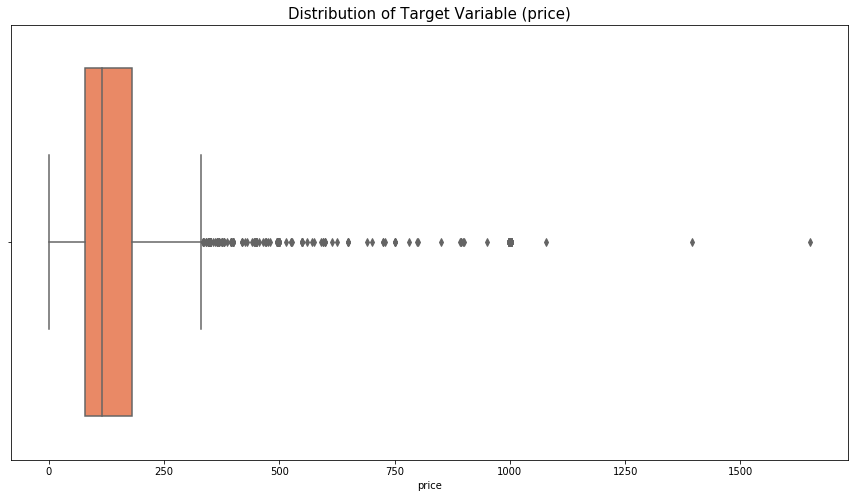

In [138]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['price'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (price)', fontsize = 15)

# display the plot
plt.show()

The above plot shows that there are extreme observations in the target variable. As these values can affect the prediction of the regression model, we remove such observations before building the model. We remove the observations for which the price is more than \\$ 1000.

### 4.4.2 Removing Outlier Values

In [139]:
# remove the observations with price greater than or equal to $ 1000

df = df[df['price'] < 1000]

# check the dimension of the data
df.shape

(3427, 23)

### 4.4.3 Checking Distribution of Target Variable after eliminating the outliers

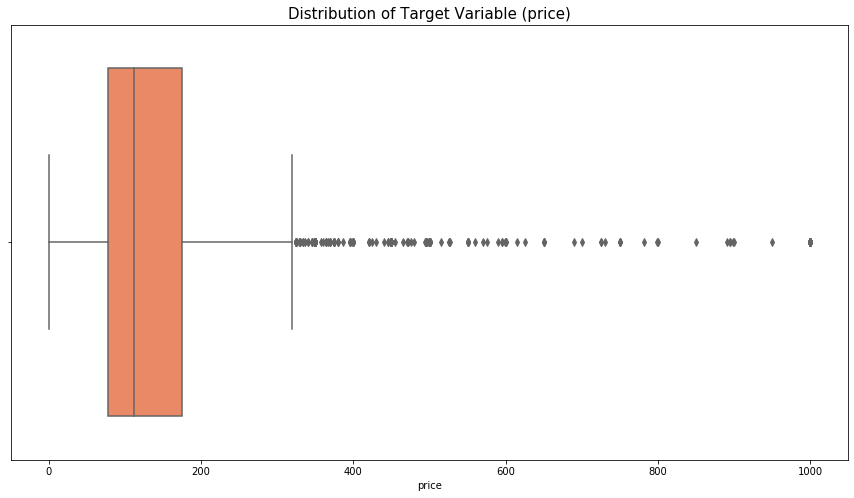

In [140]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['price'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (price)', fontsize = 15)

# display the plot
plt.show()

So the extreme outliers has been removed.

## 4.5 Handling Missing Values

### 4.5.1 Checking number of missing values in each feature

In [141]:
Total = df.isnull().sum().sort_values(ascending = False)  

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
amenities_quality,0,0.0,object
bed_type,0,0.0,object
host_response_time,0,0.0,object
host_identity_verified,0,0.0,object
neighbourhood_group_cleansed,0,0.0,object
property_type,0,0.0,object
room_type,0,0.0,object
latitude,0,0.0,float64
longitude,0,0.0,float64
bathrooms,0,0.0,int64


### 4.5.2 Visualizing Missing Values using Heat Map

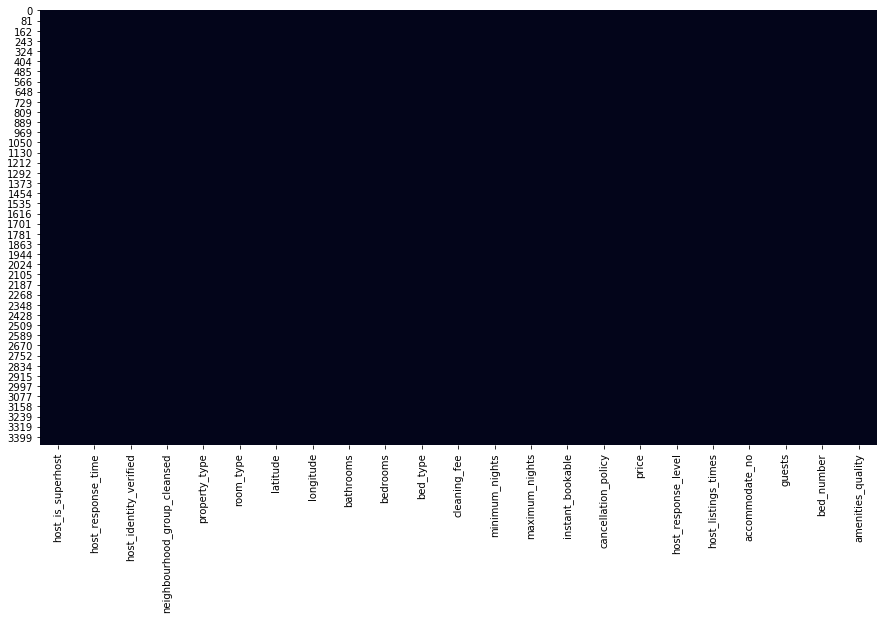

In [142]:
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

#### There are no missing values present in the data. Hence no handling of missing values needed.

## 4.6 Univariate Analysis

### 4.6.1 Univariate Analysis of Target Variable

#### Here the target variable is 'price'

#### 4.6.1.1 Checking Normality of Target Variable by Visualizing

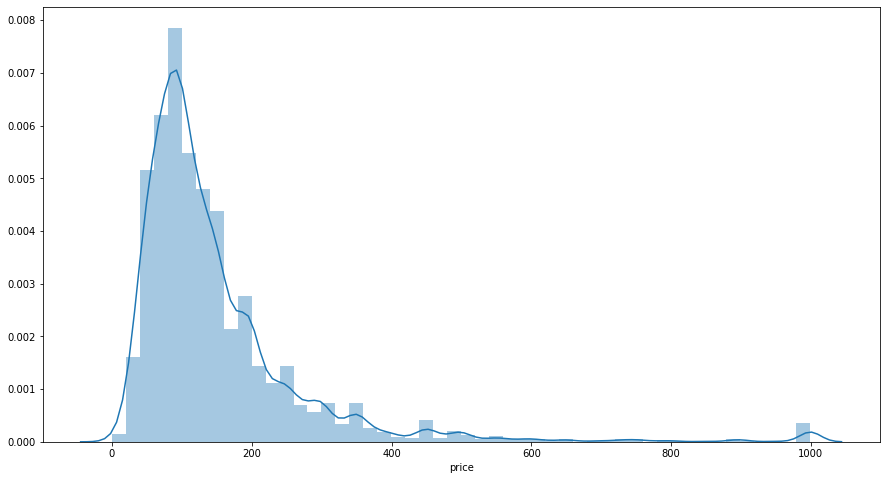

In [143]:
x = pd.Series(df.price, name="price")
target_var = sns.distplot(x)
target_var

#### 4.6.1.2 Checking Normality of Target Variable by Skewness and Kurtosis

In [144]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 3.416860
Kurtosis: 16.376228


Target variable is highly right/positive skewed.

## Univariate Analysis of Numerical Variables

In [145]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'price'],
      dtype='object')

### 4.6.2 latitude and longitude

Let us visualize the loacation of the listings with the help of latitude and longitude.

Text(0.5, 0, 'Longitude')

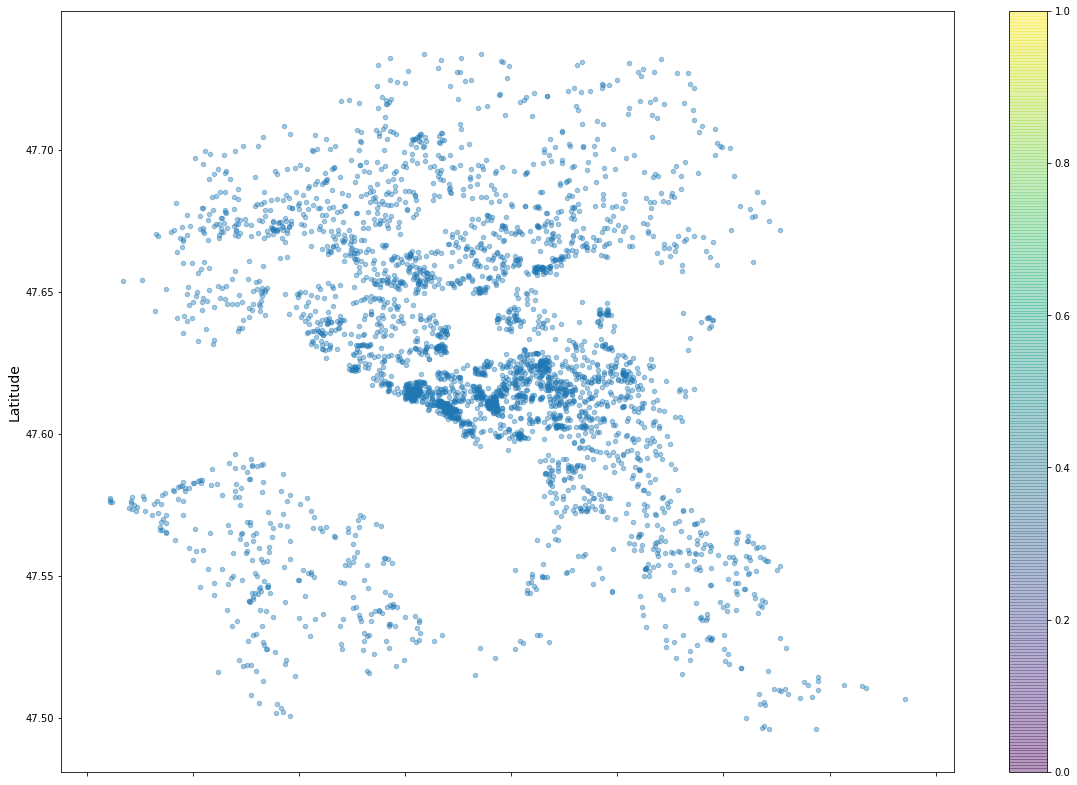

In [146]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),
                       colorbar=True, alpha=0.4,
                      )
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

### 4.6.3 bathrooms

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

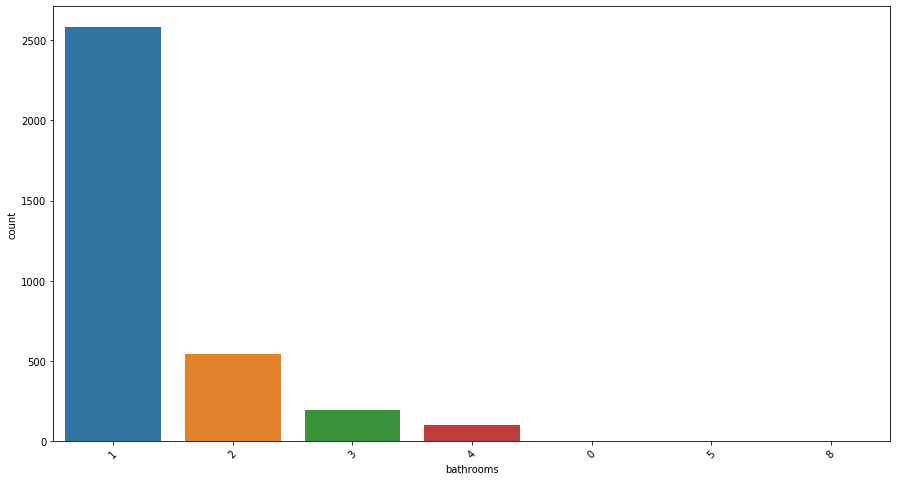

In [147]:
sns.countplot(x = 'bathrooms', data = df, order = df['bathrooms'].value_counts().index)
plt.xticks(rotation=45)

#### So most of the listings have single bathroom, followed by double.

### 4.6.4 bedrooms

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

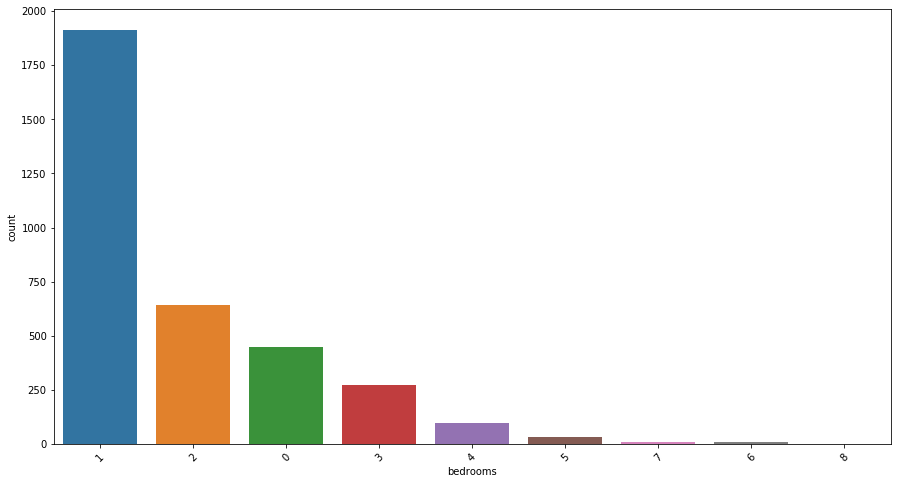

In [148]:
sns.countplot(x = 'bedrooms', data = df, order = df['bedrooms'].value_counts().index)
plt.xticks(rotation=45)

#### So most of the listings have single bedroom, followed by double.

### 4.6.5 cleaning_fee

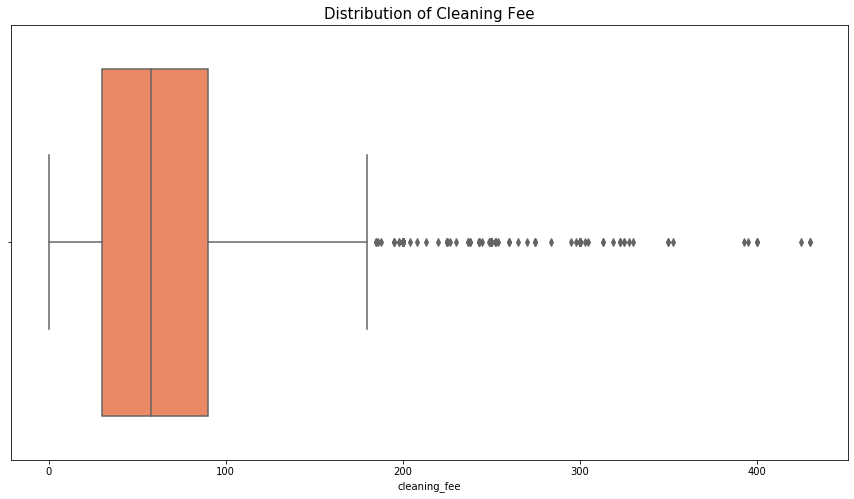

In [149]:
# plot a boxplot of cleaning_fee
sns.boxplot(df['cleaning_fee'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Cleaning Fee', fontsize = 15)

# display the plot
plt.show()

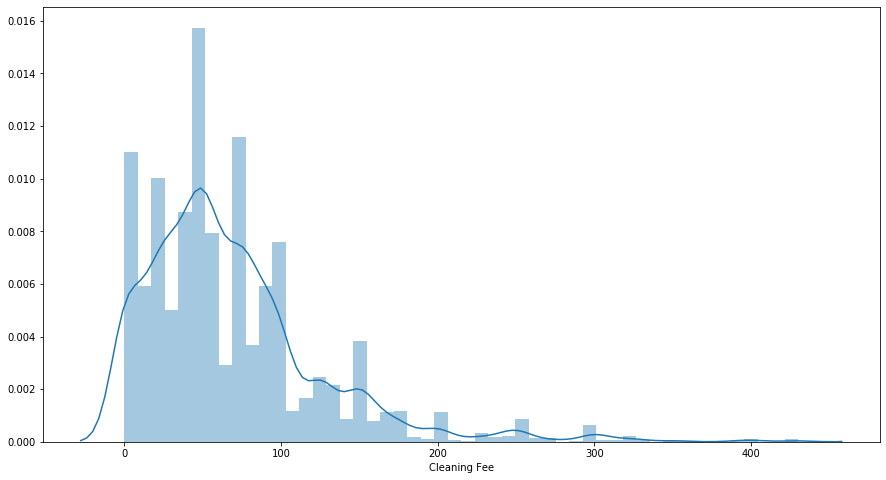

In [150]:
x = pd.Series(df.cleaning_fee, name="Cleaning Fee")
cleaning_fee = sns.distplot(x)
cleaning_fee

#### It is observed that for most of the cases cleaning fee is under \\$ 100.

### 4.6.6 minimum_nights

Let us visualize top 10 occurances of minimum_nights.

Text(0.5, 0, 'minimum_nights (Top 10)')

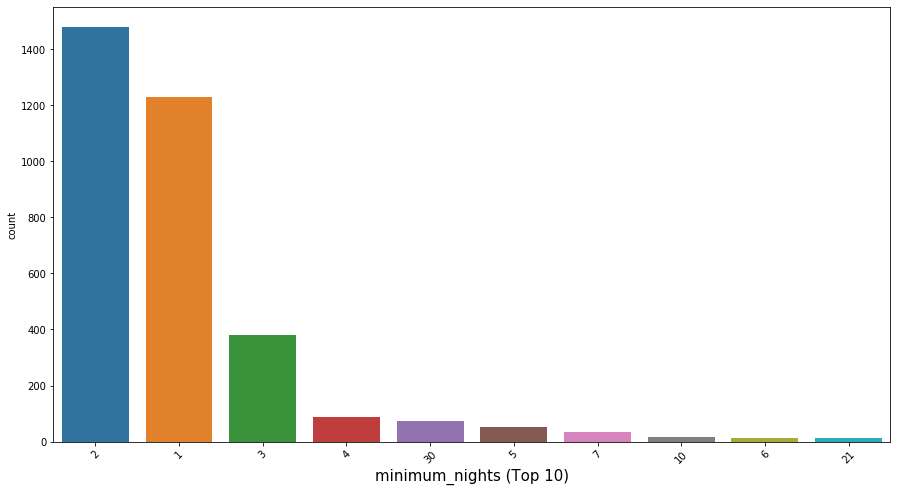

In [151]:
sns.countplot(x = 'minimum_nights', data = df, order = df['minimum_nights'].value_counts()[:10].index)
plt.xticks(rotation=45)
plt.xlabel('minimum_nights (Top 10)', fontsize =15)

#### For most of the listings, minimum number of nights are 2, followed by 1.

### 4.6.7 maximum_nights

Let us visualize top 10 occurances of maximum_nights.

Text(0.5, 0, 'maximum_nights (Top 10)')

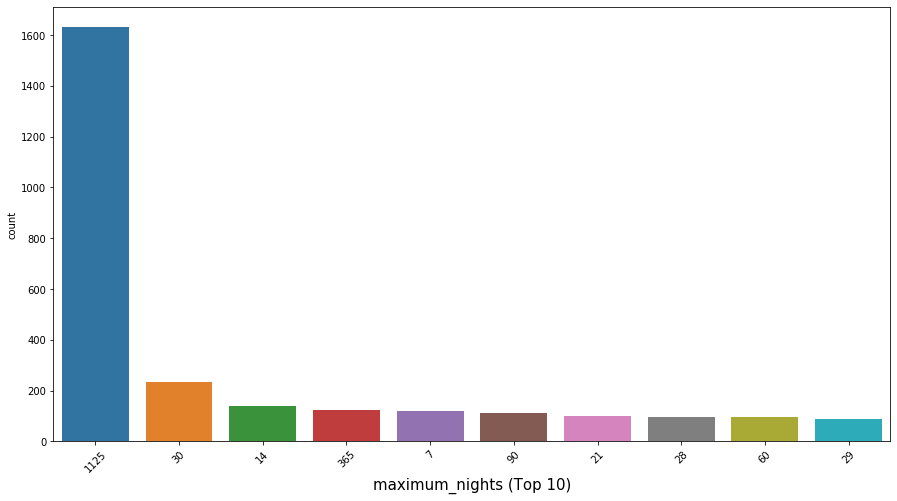

In [152]:
sns.countplot(x = 'maximum_nights', data = df, order = df['maximum_nights'].value_counts()[:10].index)
plt.xticks(rotation=45)
plt.xlabel('maximum_nights (Top 10)', fontsize =15 )

#### For most of the listings, maximum number of nights are 1125, followed by 30.

## Univariate Analysis of Categorical Variables

In [153]:
# filter the categorical features in the dataset using select_dtypes()
# include=object: selects the categorical features
df_categorical_features = df.select_dtypes(include=object)

# display the numeric features
df_categorical_features.columns

Index(['host_is_superhost', 'host_response_time', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'instant_bookable', 'cancellation_policy',
       'host_response_level', 'host_listings_times', 'accommodate_no',
       'guests', 'bed_number', 'amenities_quality'],
      dtype='object')

### 4.6.8 host_is_superhost

In [154]:
df['host_is_superhost'].value_counts()

False    1730
True     1697
Name: host_is_superhost, dtype: int64

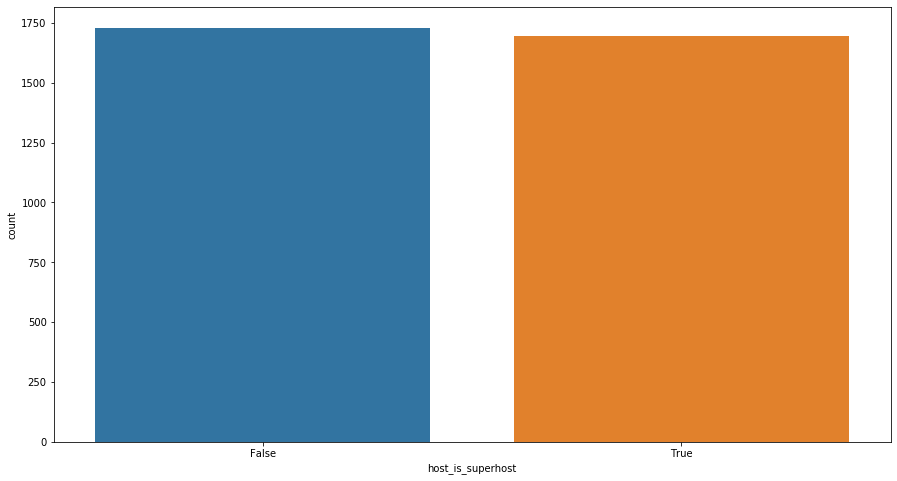

In [155]:
sns.countplot(x = 'host_is_superhost', data = df, order = df['host_is_superhost'].value_counts().index)

#### The cases for which 'host_is_superhost' is true and false are almost same.

### 4.6.9 host_response_time

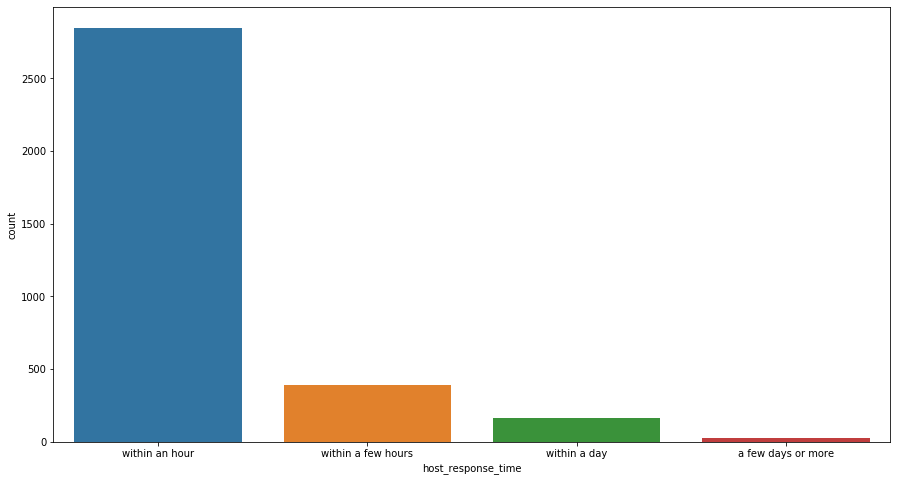

In [156]:
sns.countplot(x = 'host_response_time', data = df, order = df['host_response_time'].value_counts().index)
#plt.xticks(rotation=45)

#### So in maximum cases the host response time is within an hour.

### 4.6.10 host_identity_verified

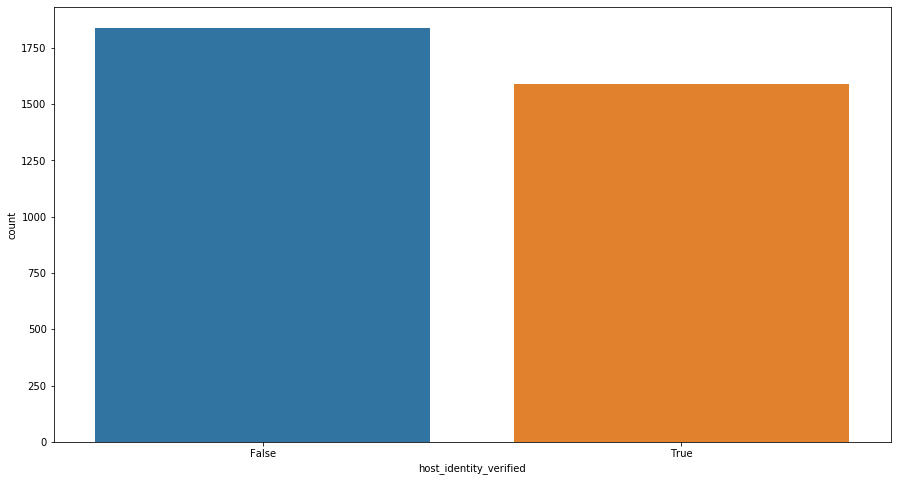

In [157]:
sns.countplot(x = 'host_identity_verified', data = df, order = df['host_identity_verified'].value_counts().index)

#### The number of listings for which host identity is not verified is slightly more.

### 4.6.11 neighbourhood_group_cleansed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

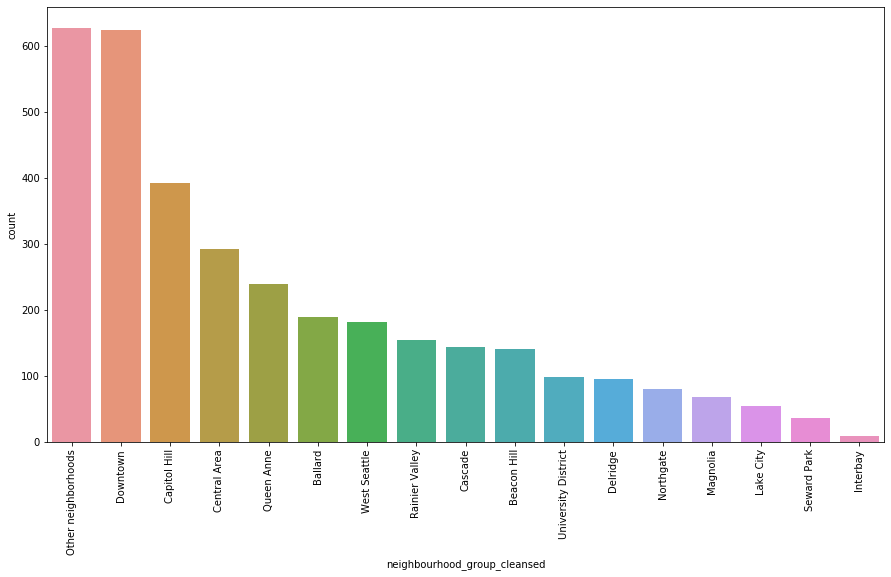

In [158]:
sns.countplot(x = 'neighbourhood_group_cleansed', data = df, order = df['neighbourhood_group_cleansed'].value_counts().index)
plt.xticks(rotation=90)

#### So if we consider a specific location, we see most of the listings are situated in Downtown Seattle, followed by Capitol Hill.

### 4.6.12 property_type

Let us visualize top 15 occurances of property_type.

Text(0.5, 0, 'property_type (Top 15)')

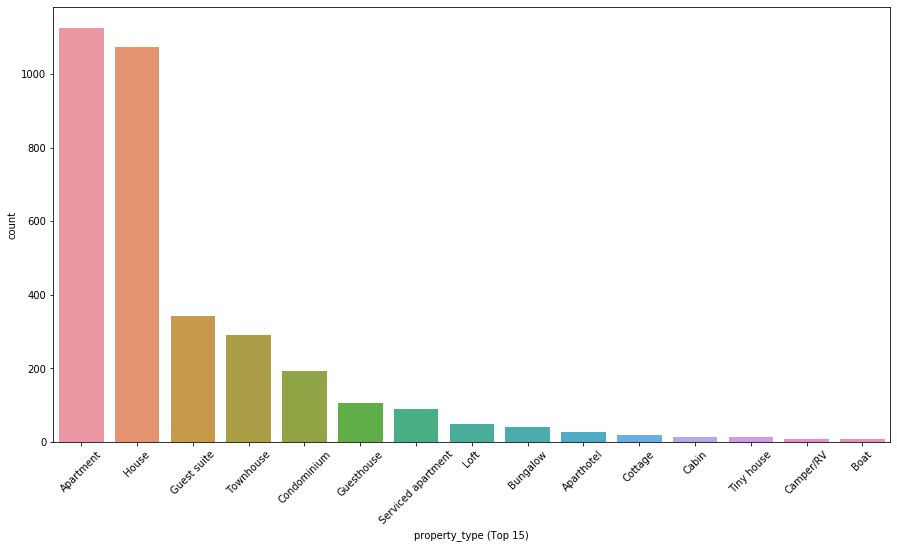

In [159]:
sns.countplot(x = 'property_type', data = df, order = df['property_type'].value_counts()[:15].index)
plt.xticks(rotation=45)
plt.xlabel('property_type (Top 15)')

#### Most of the properties are Apartments, followed by Houses, then Guest suite, and so on.

### 4.6.13 room_type

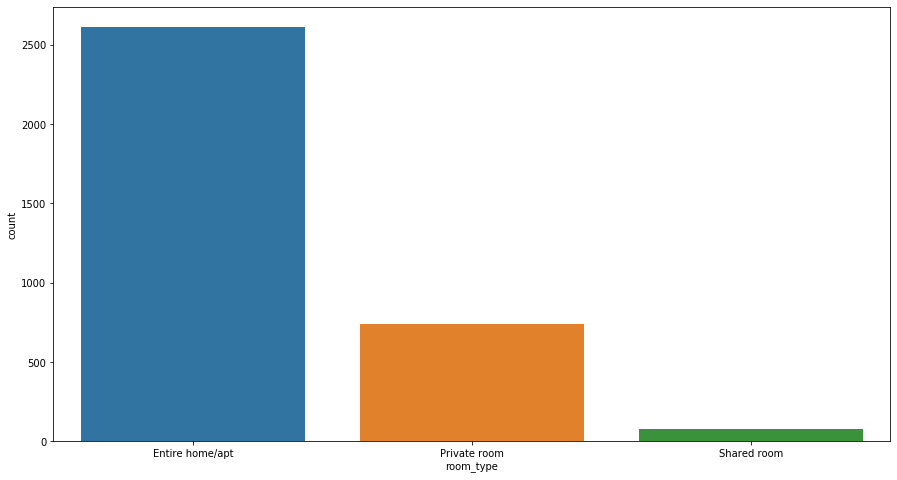

In [160]:
sns.countplot(x = 'room_type', data = df, order = df['room_type'].value_counts().index)

#### For maximum number of listings, the property type is Entire home/apartment.

### 4.6.14 bed_type

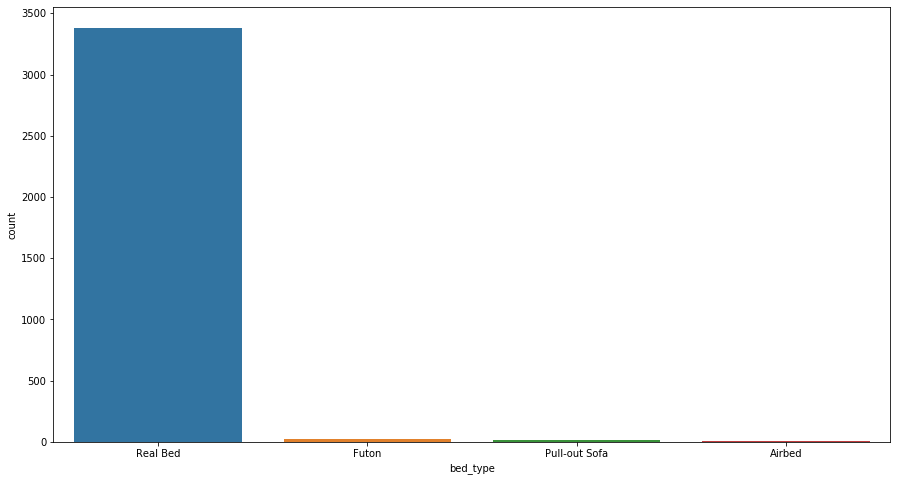

In [161]:
sns.countplot(x = 'bed_type', data = df, order = df['bed_type'].value_counts().index)

#### So almost all the beds are of Real Bed type.

### 4.6.15 instant_bookable

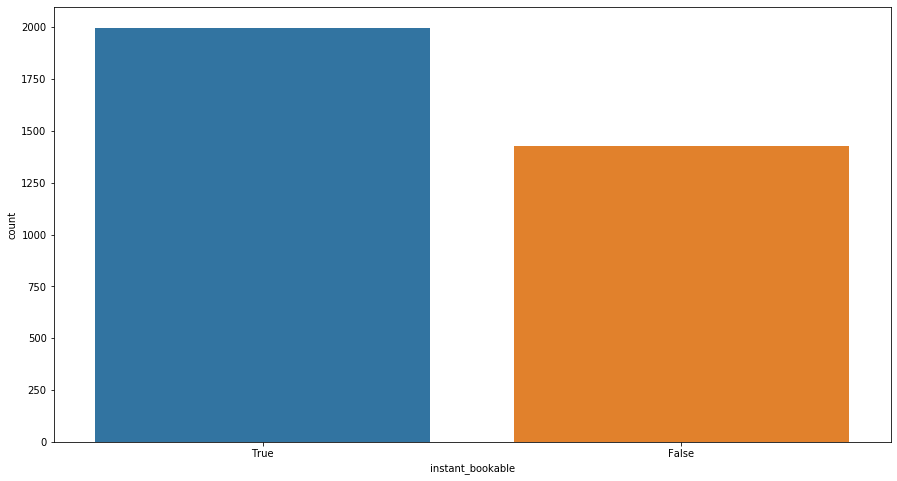

In [162]:
sns.countplot(x = 'instant_bookable', data = df, order = df['instant_bookable'].value_counts().index)

#### Most of the listings are instant bookable.

### 4.6.16 cancellation_policy

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

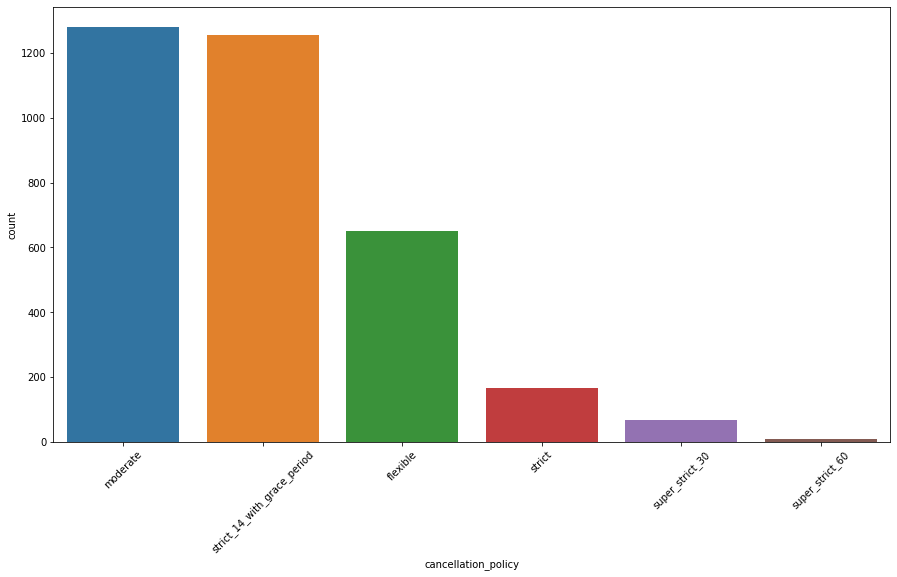

In [163]:
sns.countplot(x = 'cancellation_policy', data = df, order = df['cancellation_policy'].value_counts().index)
plt.xticks(rotation=45)

#### In maximum cases, the cancellation policy is moderate.

### 4.6.17 host_response_level

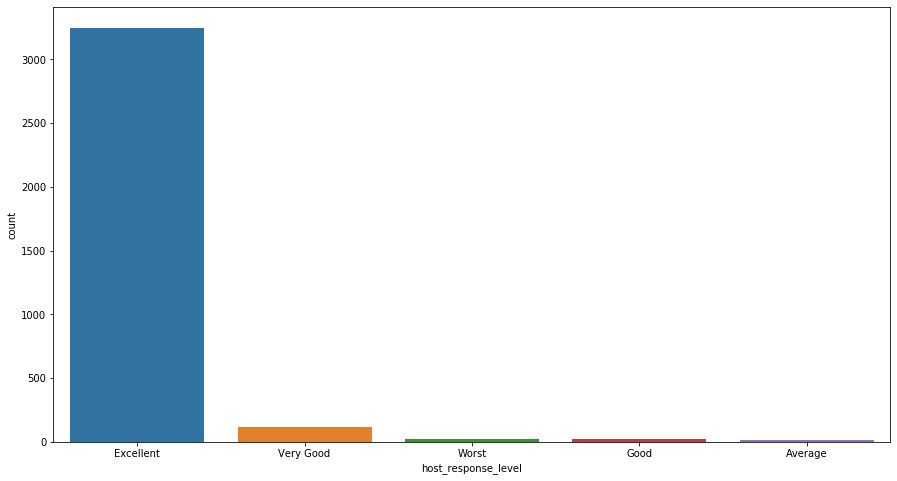

In [164]:
sns.countplot(x = 'host_response_level', data = df, order = df['host_response_level'].value_counts().index)

#### Response level for most of the hosts are Excellent.

### 4.6.18 host_listings_times

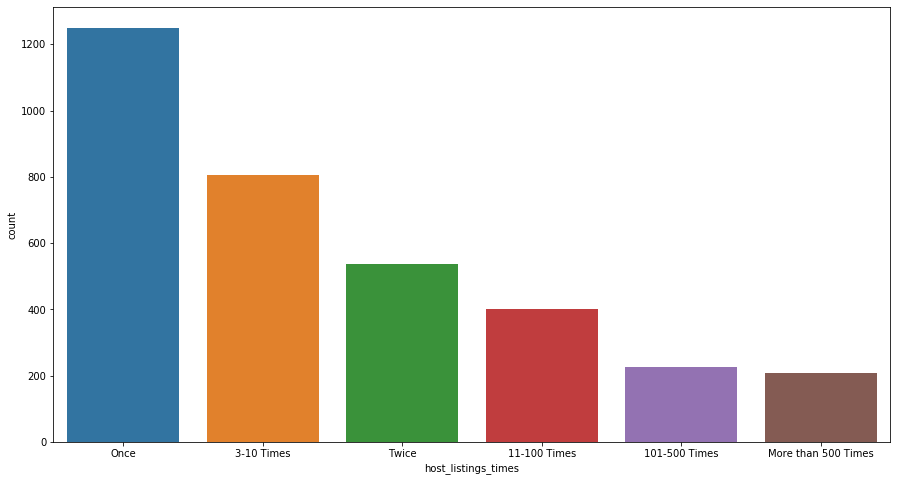

In [165]:
sns.countplot(x = 'host_listings_times', data = df, order = df['host_listings_times'].value_counts().index)

#### For most of the cases, hosts have done their listing only once.

### 4.6.19 accommodate_no

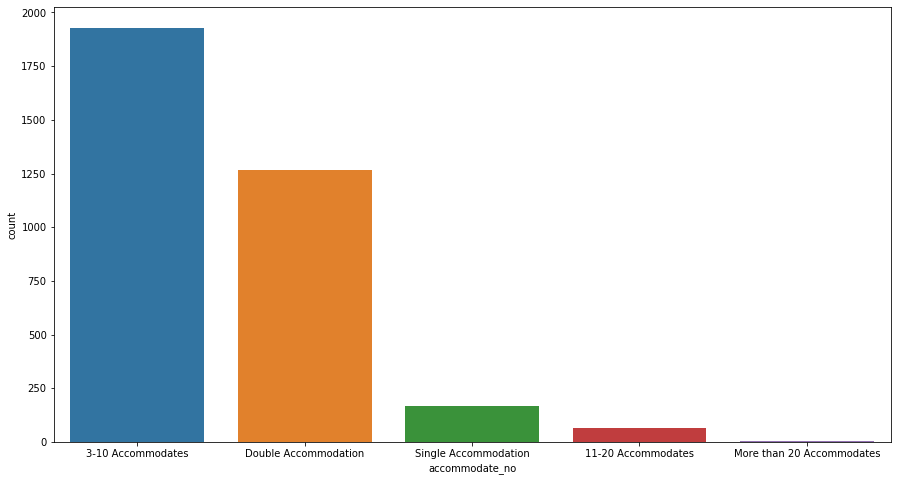

In [166]:
sns.countplot(x = 'accommodate_no', data = df, order = df['accommodate_no'].value_counts().index)

#### Individually considering, most of the properties have double accommodation.

### 4.6.20 guests

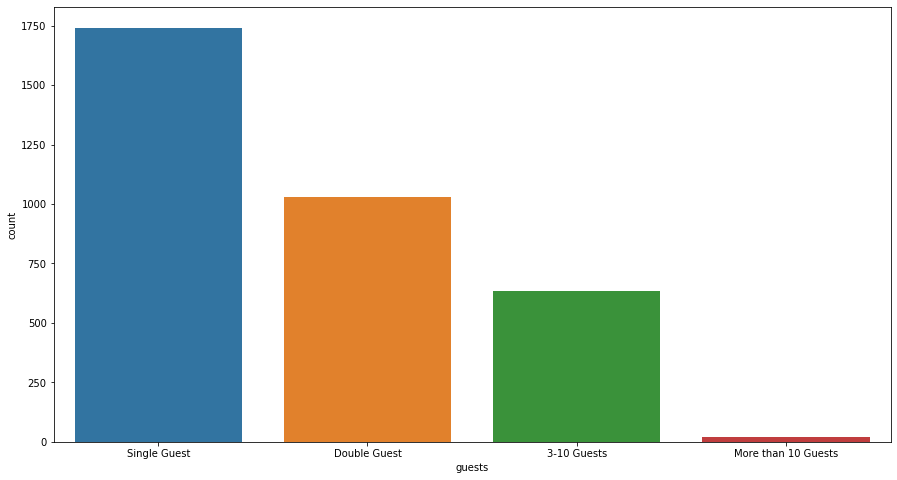

In [167]:
sns.countplot(x = 'guests', data = df, order = df['guests'].value_counts().index)

#### Most of the properties allow single guest.

### 4.6.21 bed_number

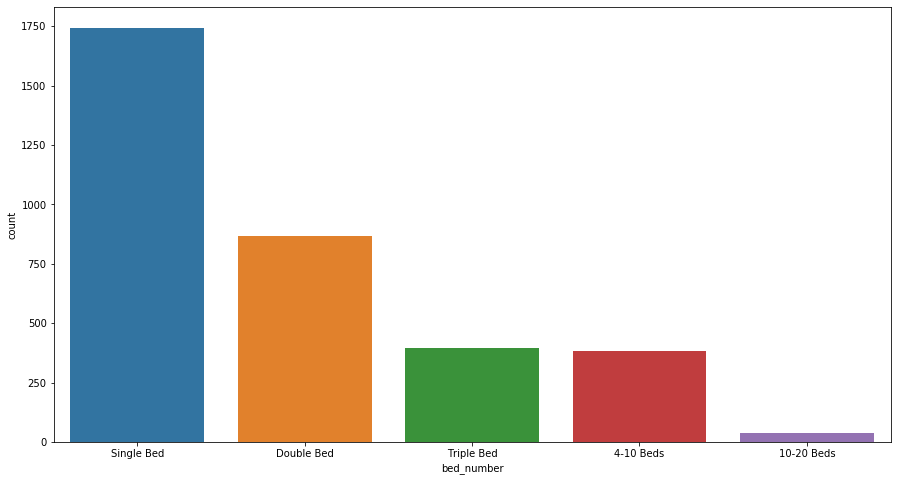

In [168]:
sns.countplot(x = 'bed_number', data = df, order = df['bed_number'].value_counts().index)

#### Most listings have Single Bed.

### 4.6.22 amenities_quality

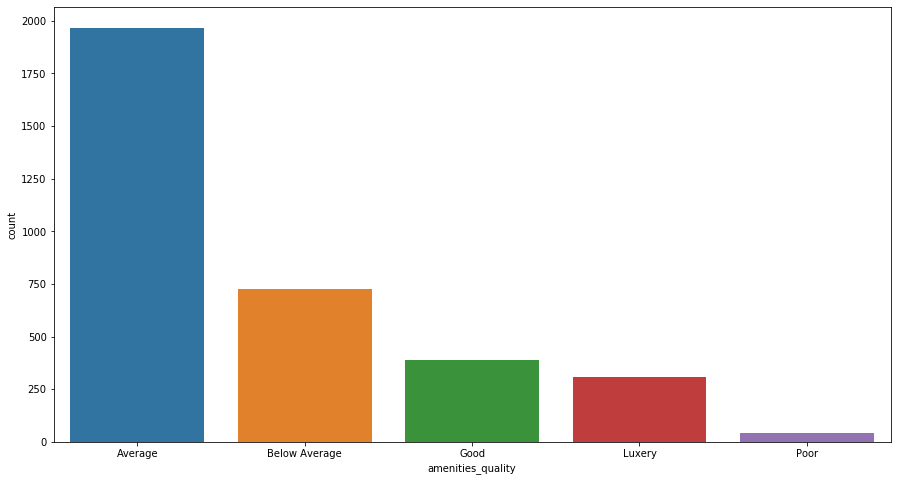

In [169]:
sns.countplot(x = 'amenities_quality', data = df, order = df['amenities_quality'].value_counts().index)

#### Most listings comes under category 'Average' if quality of amenities are considered.

## 4.7 Multivariate Analysis

#### Now let us check the relationship between different independent features and target variable.

### 4.7.1 Analysis of price with host_response_level

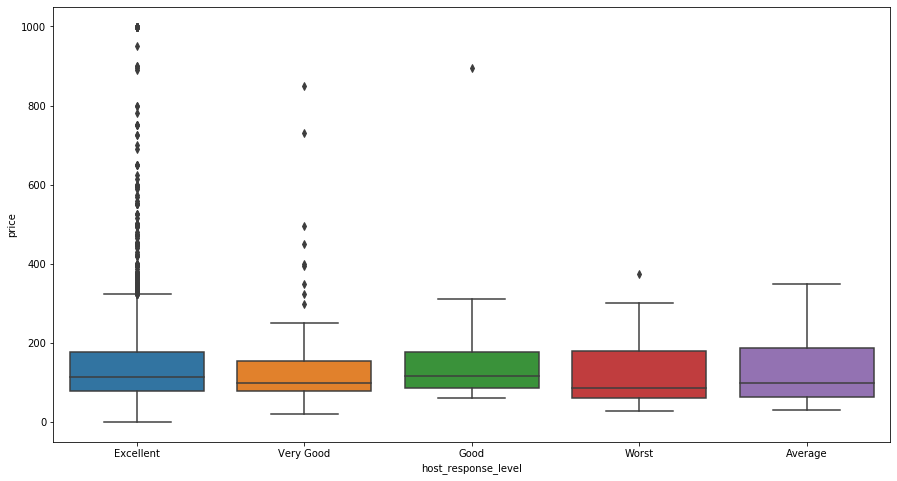

In [170]:
sns.boxplot(data=df,x='host_response_level', y='price')

### 4.7.2 Analysis of price with host_listings_times

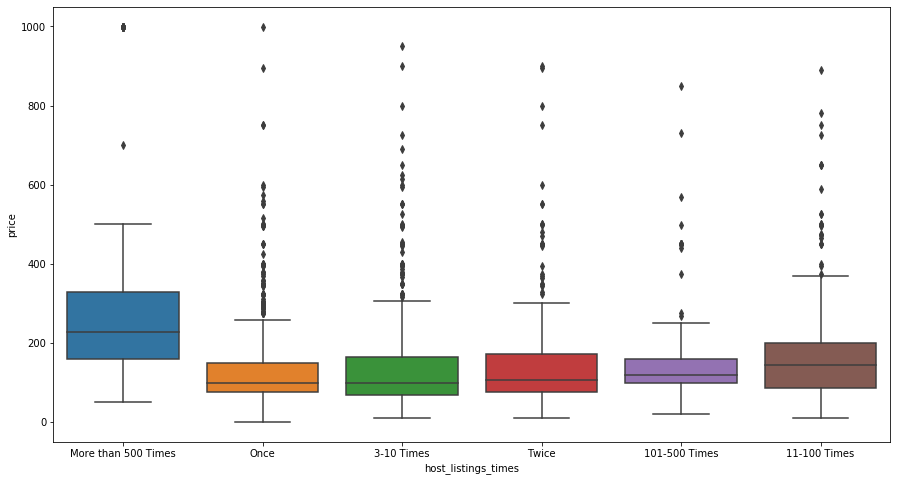

In [171]:
sns.boxplot(data=df,x='host_listings_times', y='price')
#plt.xticks(rotation=90)

### 4.7.3  Analysis of price with accommodate_no

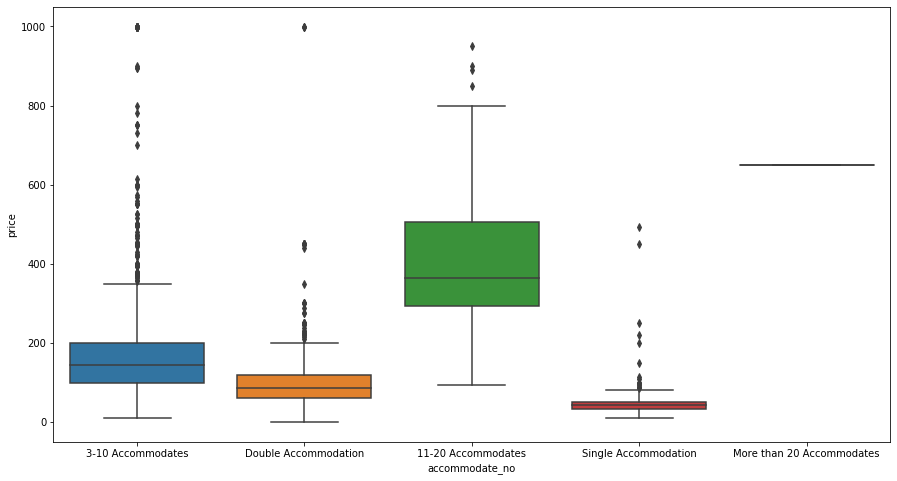

In [172]:
sns.boxplot(data=df,x='accommodate_no', y='price')
#plt.xticks(rotation=90)

#### Properties having number of accomodates more than 20 are most pricey on average.

### 4.7.4 Analysis of price with latitude and longitude (i.e. location)

Text(0.5, 0, 'Longitude')

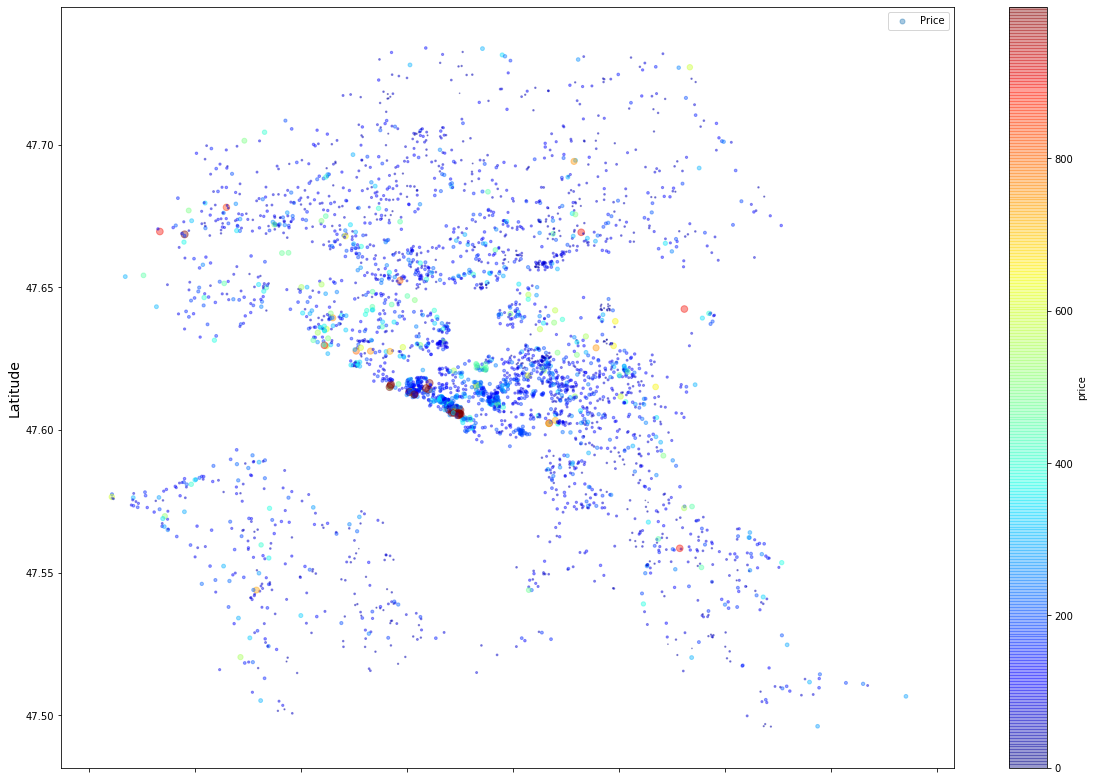

In [174]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),
                       s=df['price']/20, label="Price",
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

### 4.7.5 Analysis of price with guests

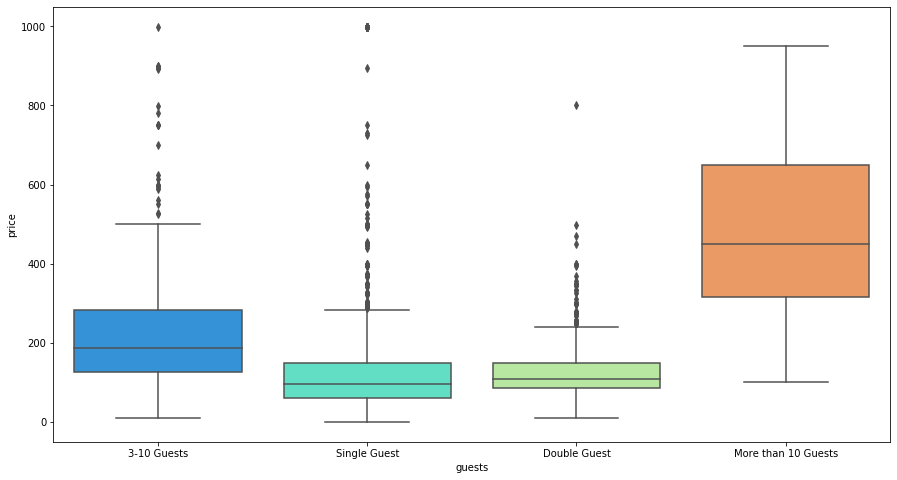

In [175]:
sns.boxplot(data=df,x='guests', y='price', palette = 'rainbow')

#### Properties allowing more than 10 guests have highest average price.

### 4.7.6 Analysis of price with bathrooms

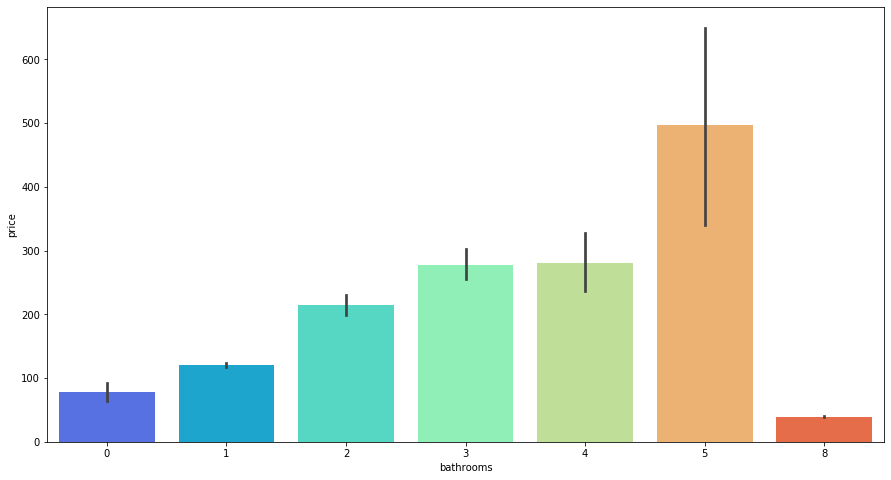

In [176]:
sns.barplot(data=df,x='bathrooms', y='price', palette = 'rainbow')

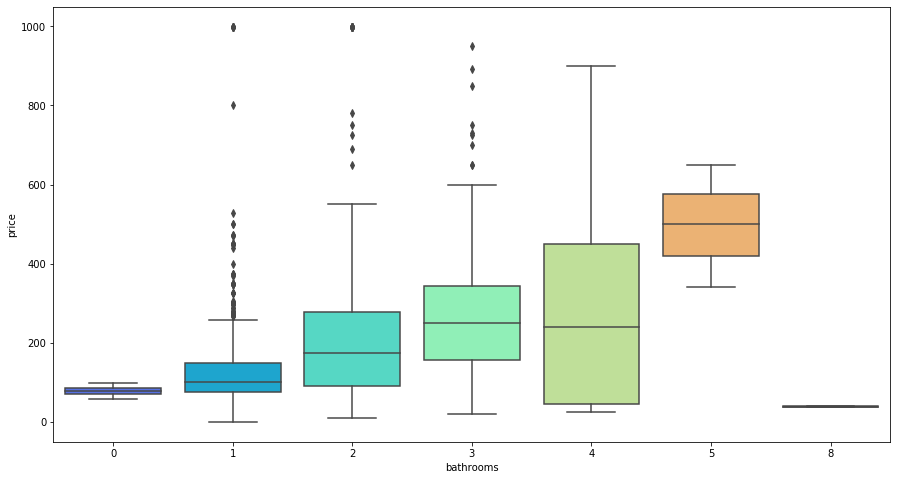

In [177]:
sns.boxplot(y='price',x='bathrooms',data=df,palette = "rainbow")
plt.show()

#### Properties having 5 bathrooms have maximum average price, and properties having no bathrooms have minimum average price. The property having 8 bathrooms are also very less priced.

### 4.7.7 Analysis of price with bedrooms

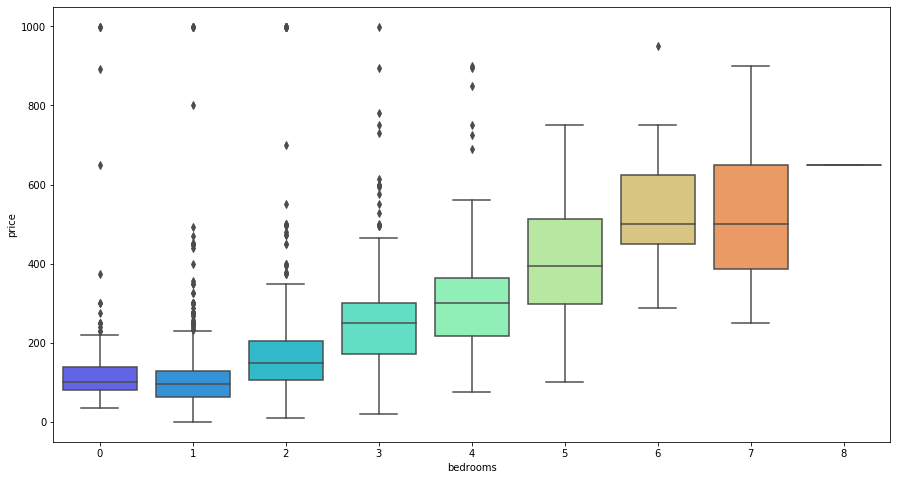

In [178]:
sns.boxplot(y='price',x='bedrooms',data=df,palette = "rainbow")
plt.show()

#### Property having 8 bedrooms is the most pricey one. Apart from that, properties having 6 and 7 bedrooms have comparatively high average price, and properties having no bedrooms have minimum average price. However, there are few properties which are very pricey despite having no bedrooms or very few (1 or 2) bedrooms.

### 4.7.8 Analysis of price with cleaning_fee

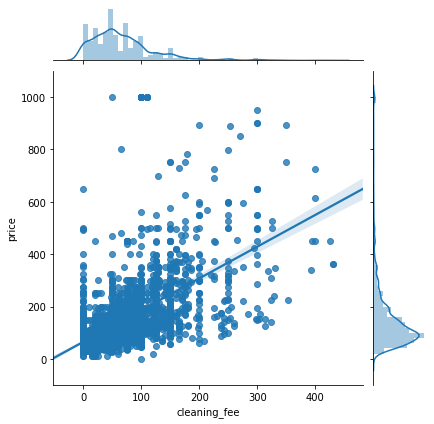

In [179]:
x = df[['price','cleaning_fee']]
sns.jointplot(x.loc[:,'cleaning_fee'], x.loc[:,'price'], kind="reg")

There is no specific relation between price and cleaning_fee.

### 4.7.9 Analysis of price with minimum_nights

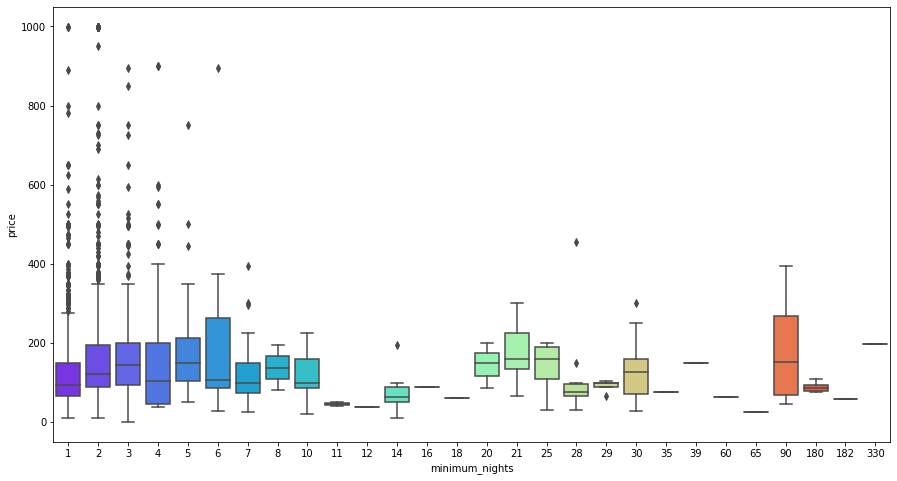

In [180]:
sns.boxplot(y='price',x='minimum_nights',data=df,palette = "rainbow")
plt.show()

### 4.7.10 Analysis of price with maximum_nights

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]), <a list of 92 Text xticklabel objects>)

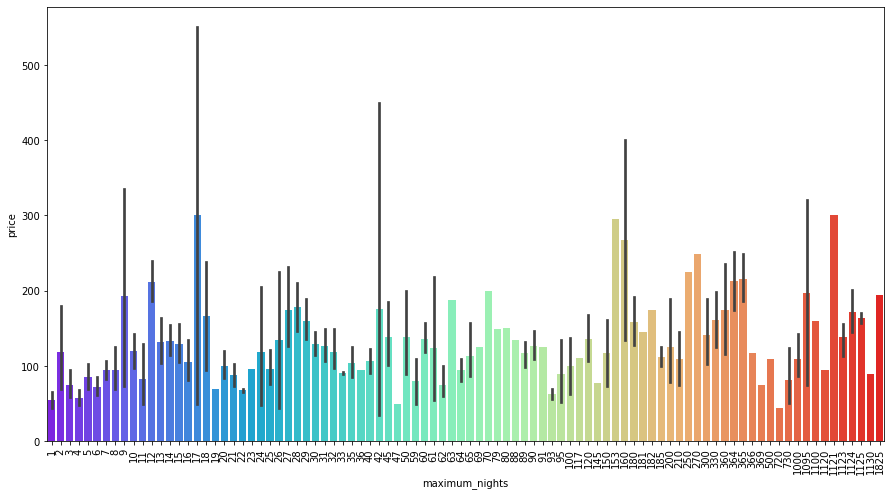

In [181]:
sns.barplot(data=df,x='maximum_nights', y='price', palette = 'rainbow')
plt.xticks(rotation=90)

### 4.7.11 Analysis of price with host_response_time

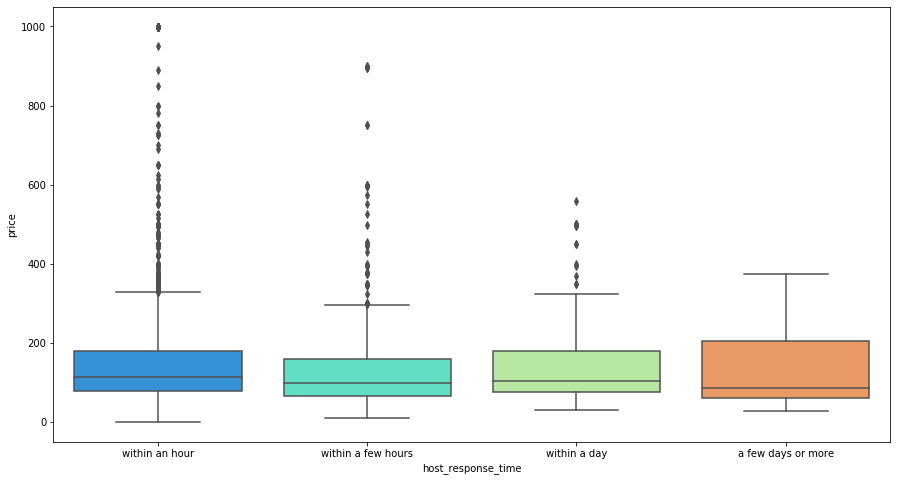

In [182]:
sns.boxplot(y='price',x='host_response_time',data=df,palette = "rainbow")
plt.show()

#### Average price for all four types of host_response_time is almost same. However, properties for which hosts replies within one hour has highest number of high-priced properties.

### 4.7.12 Analysis of price with neighbourhood_group_cleansed

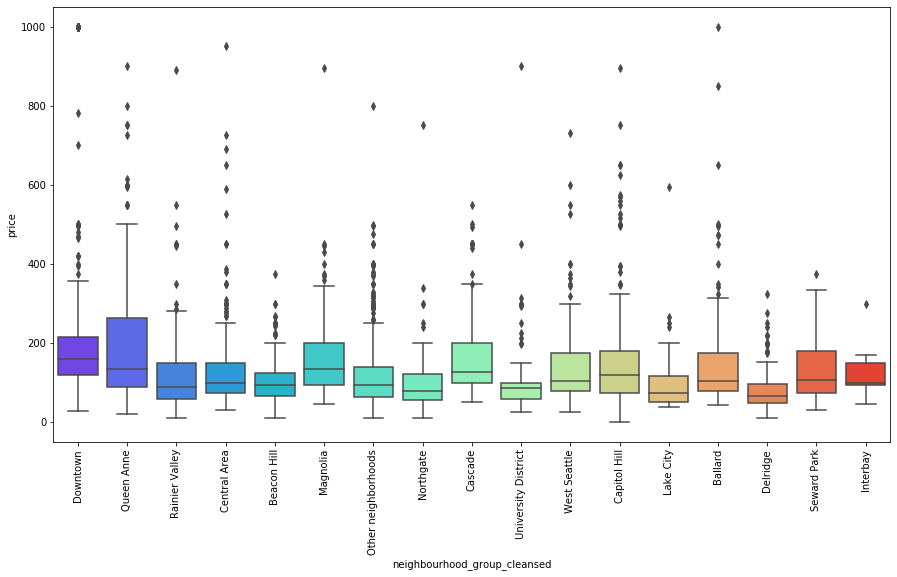

In [183]:
sns.boxplot(y='price',x='neighbourhood_group_cleansed',data=df,palette = "rainbow")
plt.xticks(rotation=90)
plt.show()

#### Properties situated at Downtown has highest average price.

### 4.7.13 Analysis of price with property_type

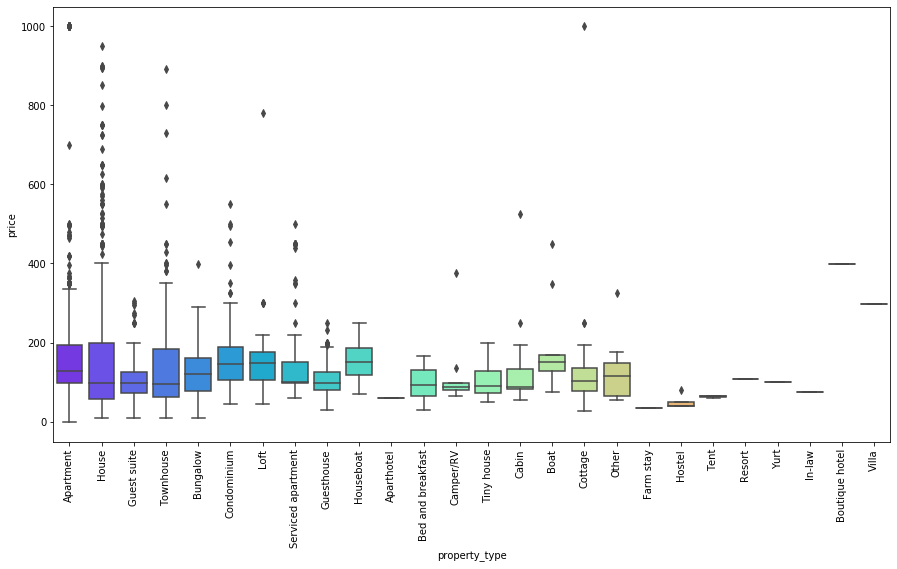

In [184]:
sns.boxplot(y='price',x='property_type',data=df,palette = "rainbow")
plt.xticks(rotation=90)
plt.show()

#### Houseboats have highest average price.

### 4.7.14 Analysis of price with room_type

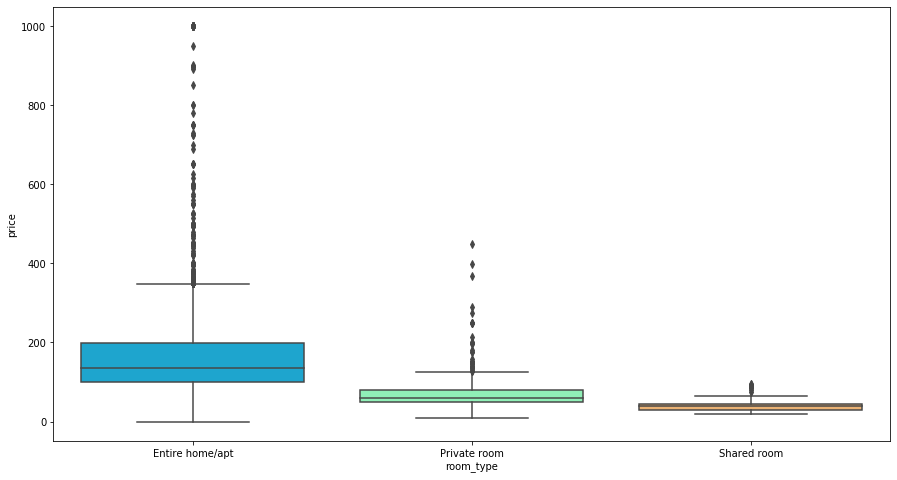

In [185]:
sns.boxplot(y='price',x='room_type',data=df,palette = "rainbow")
#plt.xticks(rotation=90)
plt.show()

#### Entire home/apartment type properties have highest average price.

### 4.7.15 Analysis of price with bed_type

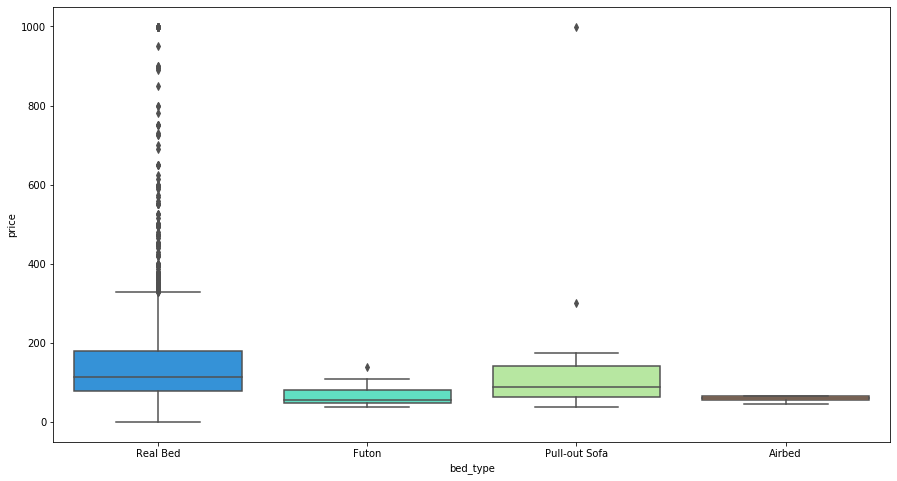

In [186]:
sns.boxplot(y='price',x='bed_type',data=df,palette = "rainbow")
#plt.xticks(rotation=90)
plt.show()

#### Real Bed bed_type has highest average price.

### 4.7.16 Analysis of price with cancellation_policy

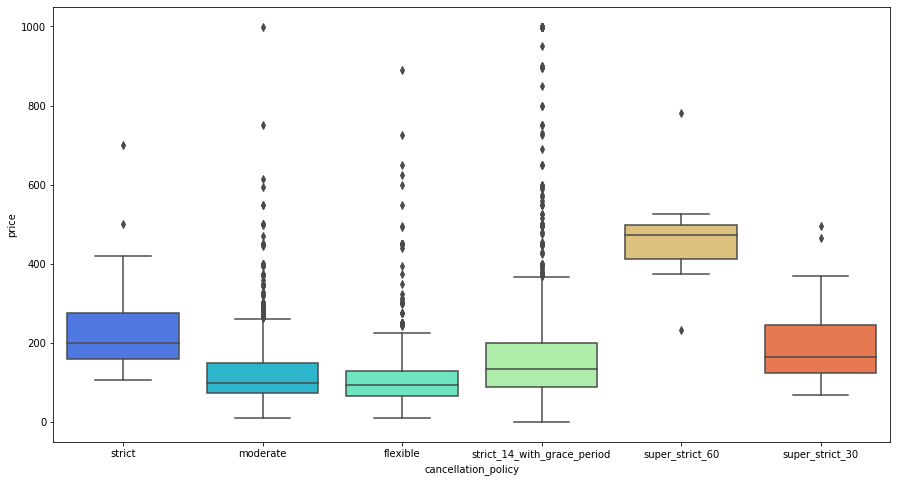

In [187]:
sns.boxplot(y='price',x='cancellation_policy',data=df,palette = "rainbow")
#plt.xticks(rotation=90)
plt.show()

#### Properties having super_strict_60 cancellation policy have highest average price, whereas properties having moderate and flexible cancallation policy have least average price.

### 4.7.18 Analysis of price with host_is_superhost

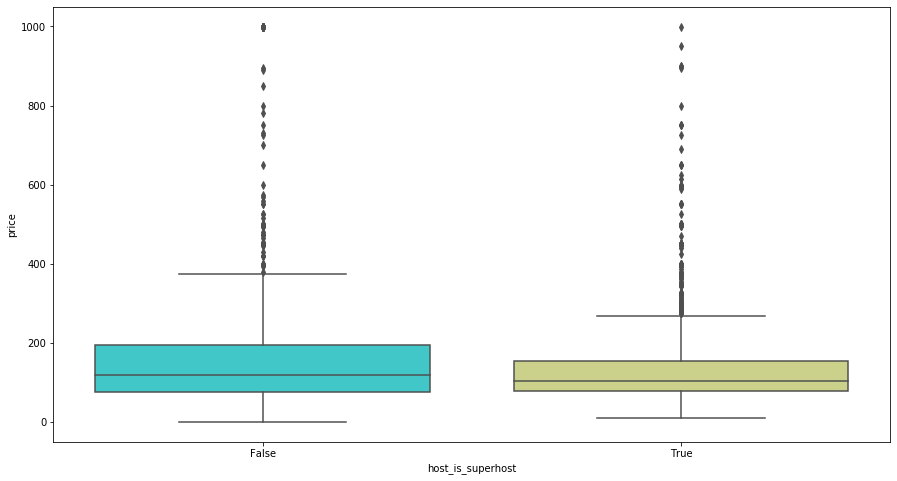

In [188]:
sns.boxplot(y='price',x='host_is_superhost',data=df,palette = "rainbow")
plt.show()

### 4.7.19 Analysis of price with host_identity_verified

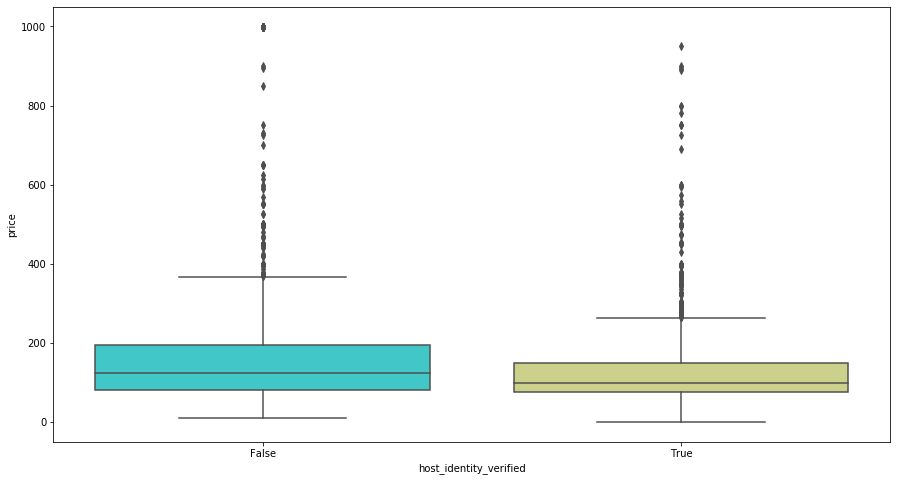

In [189]:
sns.boxplot(y='price',x='host_identity_verified',data=df,palette = "rainbow")
plt.show()

### 4.7.20 Analysis of price with instant_bookable 

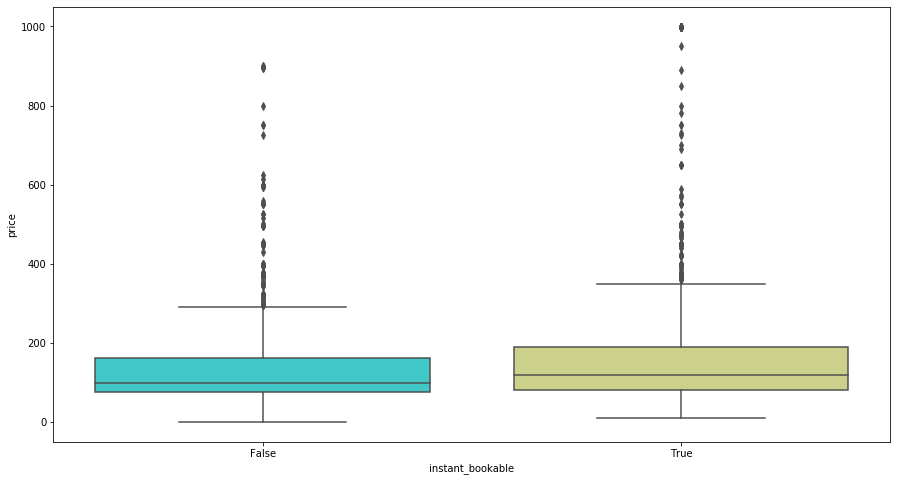

In [190]:
sns.boxplot(y='price',x='instant_bookable',data=df,palette = "rainbow")
plt.show()

#### Listings which are instant bookable have higher average price.

## 4.8 Studying Correaltion

Let us find out the correlation coefficient between different numerical variables using correlation matrix as well as using heatmap.

### 4.8.1 Creating Correlation Matrix

In [191]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,price
latitude,1.000000,-0.164129,0.004168,-0.008952,-0.011081,0.035938,-0.027745,-0.036315
longitude,-0.164129,1.000000,-0.019857,-0.039518,-0.100406,-0.008055,0.008060,-0.086979
bathrooms,0.004168,-0.019857,1.000000,0.591230,0.468376,-0.009160,0.012522,0.381977
bedrooms,-0.008952,-0.039518,0.591230,1.000000,0.615727,0.000664,0.015201,0.494183
cleaning_fee,-0.011081,-0.100406,0.468376,0.615727,1.000000,0.070625,0.143360,0.547365
minimum_nights,0.035938,-0.008055,-0.009160,0.000664,0.070625,1.000000,0.042874,-0.015878
maximum_nights,-0.027745,0.008060,0.012522,0.015201,0.143360,0.042874,1.000000,0.129507
price,-0.036315,-0.086979,0.381977,0.494183,0.547365,-0.015878,0.129507,1.000000


### 4.8.2 Plotting heatmap for diagonal correlation matrix

As correlation matrix is symmetrical matrix, hence plotting only upper or lower triangle is sufficient.

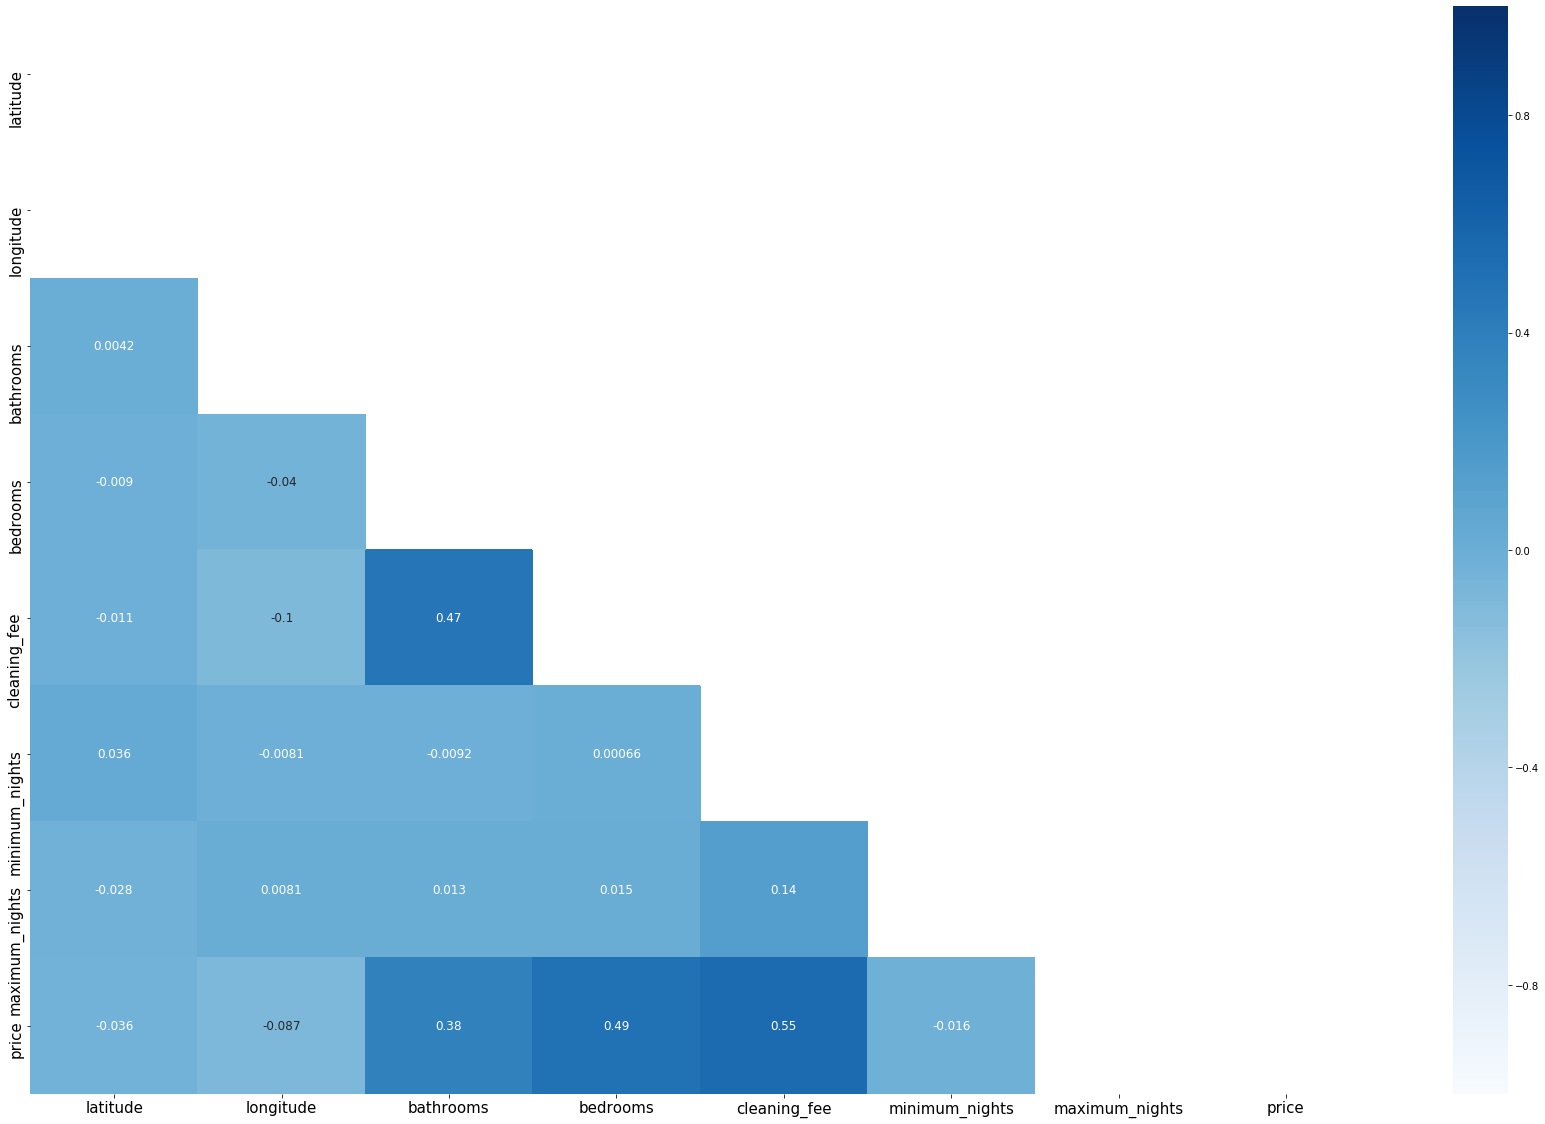

In [192]:
plt.figure(figsize=(30,20))

mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask,k= -1)] = True


sns.heatmap(corrmat, cmap='Blues', vmax=1.0,vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

## 4.9 Preparing the Data

#### As we have seen in section 4.6.1 that the distribution of target variable is not normally distributed. Hence the target variable is log transformed so that it becomes as normal as possible.

### 4.9.1 Log Transformation of price (Target Variable)

In [193]:
# log transformation for normality using np.log()
df['log_price'] = np.log(df['price'])

# display first 5 rows of the data
df.head()

,host_is_superhost,host_response_time,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,bathrooms,bedrooms,bed_type,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,host_response_level,host_listings_times,accommodate_no,guests,bed_number,amenities_quality,log_price
0,False,within an hour,False,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,2,2,Real Bed,129.0,2,1125,True,strict,279.0,Excellent,More than 500 Times,3-10 Accommodates,3-10 Guests,Double Bed,Average,5.631212
1,True,within an hour,True,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,0,Real Bed,50.0,2,30,True,moderate,99.0,Excellent,Once,Double Accommodation,Single Guest,Single Bed,Average,4.595120
2,True,within an hour,False,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,1,1,Real Bed,25.0,2,28,False,moderate,75.0,Excellent,Once,3-10 Accommodates,Double Guest,Double Bed,Average,4.317488
3,True,within a few hours,True,Central Area,House,Private room,47.601922,-122.307979,1,1,Real Bed,0.0,2,30,False,flexible,70.0,Very Good,Once,Double Accommodation,Single Guest,Single Bed,Below Average,4.248495
4,True,within an hour,True,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,3,3,Real Bed,99.0,2,12,False,flexible,242.0,Excellent,3-10 Times,3-10 Accommodates,3-10 Guests,Triple Bed,Average,5.488938


In [194]:
df['log_price'].unique()

array([5.63121178, 4.59511985, 4.31748811, 4.24849524, 5.48893773,
       6.06378521, 4.09434456, 4.82831374, 5.4161004 , 5.38907173,
       3.91202301, 5.29831737, 4.55387689, 5.19295685, 3.97029191,
       4.60517019, 5.24702407, 6.04025471, 4.17438727, 4.98360662,
       4.69134788, 3.80666249, 4.77912349, 4.65396035, 5.85793315,
       5.6347896 , 5.99146455, 6.38856141, 4.00733319, 5.01063529,
       6.2146081 , 3.68887945, 5.27299956, 5.39362755, 5.59471138,
       4.47733681, 4.36944785, 4.78749174, 5.22035583, 6.30991828,
       4.38202663, 6.20455776, 4.49980967, 5.16478597, 4.99721227,
       2.30258509, 4.44265126, 5.68697536, 4.48863637, 5.433722  ,
       6.90675478, 5.29330482, 4.94875989, 6.3952616 , 6.47697236,
       4.97673374, 3.66356165, 5.0689042 , 5.00394631, 5.0937502 ,
       3.8286414 , 5.52146092, 5.95583737, 6.26720055, 3.8501476 ,
       5.18738581, 5.92692603, 5.24174702, 5.02388052, 5.75257264,
       6.10924758, 5.70044357, 4.35670883, 4.70048037, 4.07753

In [195]:
df.shape

(3427, 24)

In [196]:
df = df[df['log_price'] > 0]

# check the dimension of the data
df.shape

(3426, 24)

Now let us check the normality of log transformed Target Variable.

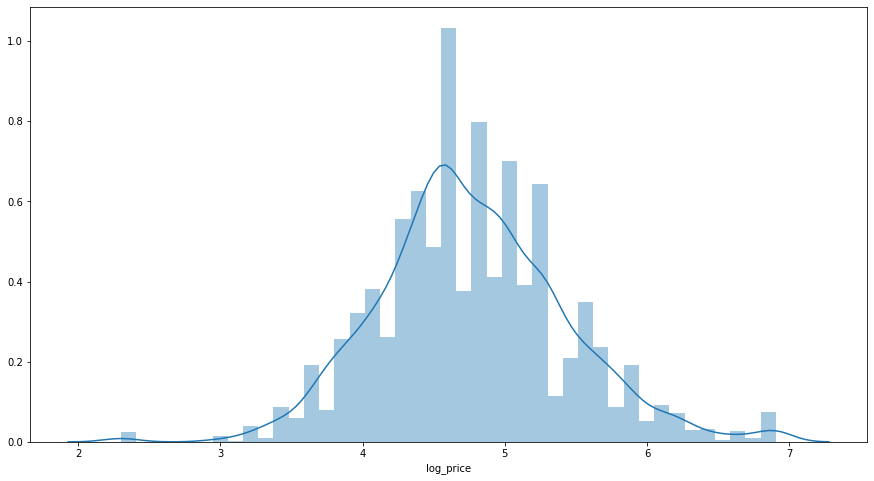

In [197]:
x = pd.Series(df.log_price, name="log_price")
target_var_log = sns.distplot(x)
target_var_log

In [198]:
print("Skewness: %f" % df['log_price'].skew())
print("Kurtosis: %f" % df['log_price'].kurt())

Skewness: 0.274397
Kurtosis: 0.734893


#### So we see after log transformation the distribution of price has become almost normal.

### 4.9.2 To reduce the complexity of the model, the feature 'amenities' is dropped from the dataset.

In [199]:
#df.drop(['amenities'], axis=1, inplace=True)

In [200]:
df.columns

Index(['host_is_superhost', 'host_response_time', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'bathrooms', 'bedrooms', 'bed_type',
       'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price', 'host_response_level',
       'host_listings_times', 'accommodate_no', 'guests', 'bed_number',
       'amenities_quality', 'log_price'],
      dtype='object')

In [201]:
df.shape

(3426, 24)

So now we can proceed for model creation.

# 5. Linear Regression (OLS)

## 5.1 Linear Regression (OLS) : Dummy encoding of categorical variables

In [202]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'price', 'log_price'],
      dtype='object')

In [203]:
# filter the categorical features in the dataset using select_dtypes()
# include=object: selects the categorical features
df_categorical_features = df.select_dtypes(include=object)

# display the numeric features
df_categorical_features.columns

Index(['host_is_superhost', 'host_response_time', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'instant_bookable', 'cancellation_policy',
       'host_response_level', 'host_listings_times', 'accommodate_no',
       'guests', 'bed_number', 'amenities_quality'],
      dtype='object')

In [204]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categorical_features, drop_first = True)

## 5.2 Linear Regression (OLS) : Concatenating Numerical, Boolean and Dummy Encoded Categorical Features

In [205]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,price,log_price,host_is_superhost_True,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_identity_verified_True,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_True,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_level_Excellent,host_response_level_Good,host_response_level_Very Good,host_response_level_Worst,host_listings_times_11-100 Times,host_listings_times_3-10 Times,host_listings_times_More than 500 Times,host_listings_times_Once,host_listings_times_Twice,accommodate_no_3-10 Accommodates,accommodate_no_Double Accommodation,accommodate_no_More than 20 Accommodates,accommodate_no_Single Accommodation,guests_Double Guest,guests_More than 10 Guests,guests_Single Guest,bed_number_4-10 Beds,bed_number_Double Bed,bed_number_Single Bed,bed_number_Triple Bed,amenities_quality_Below Average,amenities_quality_Good,amenities_quality_Luxery,amenities_quality_Poor
0,47.612163,-122.338239,2,2,129.0,2,1125,279.0,5.631212,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47.640827,-122.355248,1,0,50.0,2,30,99.0,4.595120,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,47.549007,-122.273951,1,1,25.0,2,28,75.0,4.317488,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,47.601922,-122.307979,1,1,0.0,2,30,70.0,4.248495,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,47.552311,-122.293409,3,3,99.0,2,12,242.0,5.488938,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [206]:
# check the shape of the dataframe
df_dummy.shape

(3426, 90)

## 5.3 Linear Regression (OLS) : Splitting the data into training and test sets

In [207]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['price', 'log_price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['price', 'log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2740, 89)
The shape of X_test is: (686, 89)
The shape of y_train is: (2740, 2)
The shape of y_test is: (686, 2)


## 5.4 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

### 5.4.1 Build model using sm.OLS().fit()

In [208]:
# build a full model using OLS()
# consider price as the target variable
# use fit() to fit the model on train data
linreg_full_model_without_log = sm.OLS(y_train['price'], X_train).fit()

In [209]:
# print the summary output
print(linreg_full_model_without_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     48.66
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:52:41   Log-Likelihood:                -15979.
No. Observations:                2740   AIC:                         3.213e+04
Df Residuals:                    2652   BIC:                         3.266e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### 5.4.2 Predict the values using test set

In [210]:
# predict the 'price' using predict()
linreg_full_model_without_log_predictions = linreg_full_model_without_log.predict(X_test)

predicted_y = linreg_full_model_without_log_predictions

# extract the 'price' values from the test data
actual_y = y_test['price']

### 5.4.3 Compute Accuracy Measures

In [211]:
# calculate rmse using rmse()
linreg_full_model_without_log_rmse = rmse(actual_y, predicted_y)

# calculate R-squared using rsquared
linreg_full_model_without_log_rsquared = linreg_full_model_without_log.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_without_log_rsquared_adj = linreg_full_model_without_log.rsquared_adj 

### 5.4.4 Tabulate the Results

In [212]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_model_without_log_metrices = pd.Series({'Model': "Linreg full model without log of target variable ",
                     'RMSE':linreg_full_model_without_log_rmse,
                     'R-Squared': linreg_full_model_without_log_rsquared,
                     'Adj. R-Squared': linreg_full_model_without_log_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_without_log_metrices, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model without log of target variable,73.847843,0.614816,0.60218


## 5.5 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

### 5.5.1 Build model using sm.OLS().fit()

In [213]:
# build a full model using OLS()
# consider the log of price as the target variable
# use fit() to fit the model on train data
linreg_full_model_with_log = sm.OLS(y_train['log_price'], X_train).fit()

In [214]:
# print the summary output
print(linreg_full_model_with_log.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     62.11
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:52:53   Log-Likelihood:                -1247.7
No. Observations:                2740   AIC:                             2671.
Df Residuals:                    2652   BIC:                             3192.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### 5.5.2 Predict the values using test set

In [215]:
# predict the 'log_price' using predict()
linreg_full_model_with_log_predictions = linreg_full_model_with_log.predict(X_test)

In [216]:
# take the exponential of predictions using np.exp()
predicted_y = np.exp(linreg_full_model_with_log_predictions)

# extract the 'price' values from the test data
actual_y = y_test['price']

### 5.5.3 Compute accuracy measures

In [217]:
# calculate rmse using rmse()
linreg_full_model_with_log_rmse = rmse(actual_y, predicted_y)

# calculate R-squared using rsquared
linreg_full_model_with_log_rsquared = linreg_full_model_with_log.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_with_log_rsquared_adj = linreg_full_model_with_log.rsquared_adj 

### 5.5.4 Tabulate the results

In [218]:
# append the result table 
# compile the required information
linreg_full_model_with_log_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                                                 'RMSE':linreg_full_model_with_log_rmse,
                                                 'R-Squared': linreg_full_model_with_log_rsquared,
                                                 'Adj. R-Squared': linreg_full_model_with_log_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_with_log_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model without log of target variable,73.847843,0.614816,0.602180
1,Linreg full model with log of target variable,83.202553,0.670782,0.659982


# 6. Feature Selection

## 6.1 Feature Selection : Variance Inflation Factor

### 6.1.1 Filtering out features having high VIF

In [219]:
df_numeric_features_vif = df_numeric_features.drop(['price','log_price'], axis=1)
df_numeric_features_vif.head()

,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights
0,47.612163,-122.338239,2,2,129.0,2,1125
1,47.640827,-122.355248,1,0,50.0,2,30
2,47.549007,-122.273951,1,1,25.0,2,28
3,47.601922,-122.307979,1,1,0.0,2,30
4,47.552311,-122.293409,3,3,99.0,2,12


In [220]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1.130898e+06,longitude
1,1.130831e+06,latitude
2,6.757734e+00,bathrooms
3,5.454025e+00,bedrooms
4,4.144204e+00,cleaning_fee
5,2.328986e+00,maximum_nights
6,1.111900e+00,minimum_nights


#### Let us drop the columns having vif greater than 10.

In [221]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor        Features
0    5.646632        latitude
1    6.755500       bathrooms
2    5.453940        bedrooms
3    4.138964    cleaning_fee
4    1.110292  minimum_nights
5    2.327897  maximum_nights


### 6.1.2 Concatenate numerical (having VIF less than 10) and dummy encoded categorical variables

In [222]:
# consider the variables obtained from VIF
# concatenate the numerical and dummy encoded categorical variables using concat()
# use the dummy encoded categorical variables obtained in section 5.3.4
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,latitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,host_is_superhost_True,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_identity_verified_True,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_True,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_level_Excellent,host_response_level_Good,host_response_level_Very Good,host_response_level_Worst,host_listings_times_11-100 Times,host_listings_times_3-10 Times,host_listings_times_More than 500 Times,host_listings_times_Once,host_listings_times_Twice,accommodate_no_3-10 Accommodates,accommodate_no_Double Accommodation,accommodate_no_More than 20 Accommodates,accommodate_no_Single Accommodation,guests_Double Guest,guests_More than 10 Guests,guests_Single Guest,bed_number_4-10 Beds,bed_number_Double Bed,bed_number_Single Bed,bed_number_Triple Bed,amenities_quality_Below Average,amenities_quality_Good,amenities_quality_Luxery,amenities_quality_Poor
0,47.612163,2,2,129.0,2,1125,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47.640827,1,0,50.0,2,30,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,47.549007,1,1,25.0,2,28,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,47.601922,1,1,0.0,2,30,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,47.552311,3,3,99.0,2,12,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [223]:
df_dummy.shape

(3426, 87)

### 6.1.3 Split the data into train and test sets

In [224]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# consider independent variables
# create a copy of 'df_dummy' and store it as X
X = df_dummy.copy()

# extract the target variable from the data set
y = df[['price','log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2398, 88)
The shape of X_test is: (1028, 88)
The shape of y_train is: (2398, 2)
The shape of y_test is: (1028, 2)


### 6.1.4 Building Model using sm.OLS.fit()

In [225]:
# build a full model using OLS()
# consider the log of price as the target variable
# use fit() to fit the model on train data
linreg_full_model_vif = sm.OLS(y_train['log_price'], X_train).fit()

# print the summary output
print(linreg_full_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     55.80
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:53:16   Log-Likelihood:                -1088.6
No. Observations:                2398   AIC:                             2349.
Df Residuals:                    2312   BIC:                             2846.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### 6.1.5 Predicting the values using test set

In [226]:
# predict the 'log_price' using predict()
linreg_full_model_vif_predictions = linreg_full_model_vif.predict(X_test)

In [227]:
# take the exponential of predictions using np.exp()
predicted_y = np.exp(linreg_full_model_vif_predictions)

# extract the 'price' values from the test data
actual_y = y_test['price']

### 6.1.6 Compute accuracy measures

In [228]:
# calculate rmse using rmse()
linreg_full_model_vif_rmse = rmse(actual_y, predicted_y)

# calculate R-squared using rsquared
linreg_full_model_vif_rsquared = linreg_full_model_vif.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_vif_rsquared_adj = linreg_full_model_vif.rsquared_adj 

### 6.1.7 Tabulate the results

In [229]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_vif_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_full_model_vif_rmse,
                                                'R-Squared': linreg_full_model_vif_rsquared,
                                                'Adj. R-Squared': linreg_full_model_vif_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_vif_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model without log of target variable,73.847843,0.614816,0.602180
1,Linreg full model with log of target variable,83.202553,0.670782,0.659982
2,Linreg with VIF,82.771227,0.672302,0.660254


## 6.2 Feature Selection : Forward Selection

### 6.2.1 Concatenate numerical and dummy encoded categorical variables

In [230]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df.select_dtypes(include = object)

#### Dummy encoding of categorical variables

In [231]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables

In [232]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,price,log_price,host_is_superhost_True,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_identity_verified_True,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_True,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_level_Excellent,host_response_level_Good,host_response_level_Very Good,host_response_level_Worst,host_listings_times_11-100 Times,host_listings_times_3-10 Times,host_listings_times_More than 500 Times,host_listings_times_Once,host_listings_times_Twice,accommodate_no_3-10 Accommodates,accommodate_no_Double Accommodation,accommodate_no_More than 20 Accommodates,accommodate_no_Single Accommodation,guests_Double Guest,guests_More than 10 Guests,guests_Single Guest,bed_number_4-10 Beds,bed_number_Double Bed,bed_number_Single Bed,bed_number_Triple Bed,amenities_quality_Below Average,amenities_quality_Good,amenities_quality_Luxery,amenities_quality_Poor
0,47.612163,-122.338239,2,2,129.0,2,1125,279.0,5.631212,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47.640827,-122.355248,1,0,50.0,2,30,99.0,4.595120,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,47.549007,-122.273951,1,1,25.0,2,28,75.0,4.317488,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,47.601922,-122.307979,1,1,0.0,2,30,70.0,4.248495,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,47.552311,-122.293409,3,3,99.0,2,12,242.0,5.488938,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### 6.2.2 Split the data into train and test sets

In [233]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['price','log_price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['price','log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2398, 89)
The shape of X_test is: (1028, 89)
The shape of y_train is: (2398, 2)
The shape of y_test is: (1028, 2)


### 6.2.3 Find best features using forward selection method

#### Consider the 'log_price' as the target variable.

In [234]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
# 'n_jobs = -1' considers all the CPUs in the system to select the feattures
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)

# fit the step forward selection on training data using fit()
# consider the log of sales price as the target variable
sfs_forward = linreg_forward.fit(X_train, y_train['log_price'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  82 out of  89 | elapsed:    5.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    5.3s finished

[2021-01-15 22:53:34] Features: 1/89 -- score: 0.35554656381514116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    0.6s finished

[2021-01-15 22:53:35] Features: 2/89 -- score: 0.42495783077994886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    0.6s finished

[2021-01-15 22:53:35] Features: 3/89 -- score: 0.48602205553815825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.4s
[Parallel(n_job


[2021-01-15 22:54:24] Features: 35/89 -- score: 0.6553211225732095[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  54 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.1s finished

[2021-01-15 22:54:26] Features: 36/89 -- score: 0.6554638036194843[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  53 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.0s finished

[2021-01-15 22:54:28] Features: 37/89 -- score: 0.6556097693266804[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.0s finished

[2021-01-15 22:54:31] Features: 38/89 -- score: 0.6556639289535332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  51 | elapsed:

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished

[2021-01-15 22:57:00] Features: 70/89 -- score: 0.652940099606717[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.9s finished

[2021-01-15 22:57:01] Features: 71/89 -- score: 0.6526450953218195[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.5s finished

[2021-01-15 22:57:03] Features: 72/89 -- score: 0.6524225409457743[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.3s finished

[2021-01-15 22:57:04] Features: 73/89 -- score: 0.6523326899258295[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.2s fi

In [235]:
# print the number of selected features
print('Number of features selected using forward selection method:', len(sfs_forward.k_feature_names_))

# print a blank line
print('\n')

# print the selected feature names when k_features = 'best'
print('Features selected using forward selection method are: ')
print(sfs_forward.k_feature_names_)

Number of features selected using forward selection method: 45


Features selected using forward selection method are: 
('const', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'host_is_superhost_True', 'host_response_time_within a day', 'host_response_time_within an hour', 'neighbourhood_group_cleansed_Beacon Hill', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 'neighbourhood_group_cleansed_Delridge', 'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Lake City', 'neighbourhood_group_cleansed_Northgate', 'neighbourhood_group_cleansed_Other neighborhoods', 'neighbourhood_group_cleansed_Rainier Valley', 'neighbourhood_group_cleansed_West Seattle', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Condominium', 'property_type_Farm stay', 'property_type_Guest suite', 'property_type_Hostel', 'property_type_Tent', 'property_type_Yurt', 'room_type_Private room', 'roo

In [236]:
df_fs = df_dummy.loc[:,['const', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'host_is_superhost_True', 'host_response_time_within an hour', 'neighbourhood_group_cleansed_Beacon Hill', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 'neighbourhood_group_cleansed_Delridge', 'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Lake City', 'neighbourhood_group_cleansed_Northgate', 'neighbourhood_group_cleansed_Other neighborhoods', 'neighbourhood_group_cleansed_Rainier Valley', 'neighbourhood_group_cleansed_West Seattle', 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Condominium', 'property_type_Farm stay', 'property_type_Guest suite', 'property_type_Hostel', 'property_type_In-law', 'property_type_Resort', 'property_type_Tent', 'property_type_Yurt', 'room_type_Private room', 'room_type_Shared room', 'instant_bookable_True', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'host_listings_times_More than 500 Times', 'host_listings_times_Once', 'accommodate_no_Double Accommodation', 'accommodate_no_More than 20 Accommodates', 'accommodate_no_Single Accommodation', 'bed_number_4-10 Beds', 'bed_number_Double Bed', 'bed_number_Single Bed', 'bed_number_Triple Bed', 'amenities_quality_Poor']]

In [237]:
df_fs.head()

,const,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,host_is_superhost_True,host_response_time_within an hour,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_West Seattle,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Condominium,property_type_Farm stay,property_type_Guest suite,property_type_Hostel,property_type_In-law,property_type_Resort,property_type_Tent,property_type_Yurt,room_type_Private room,room_type_Shared room,instant_bookable_True,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_listings_times_More than 500 Times,host_listings_times_Once,accommodate_no_Double Accommodation,accommodate_no_More than 20 Accommodates,accommodate_no_Single Accommodation,bed_number_4-10 Beds,bed_number_Double Bed,bed_number_Single Bed,bed_number_Triple Bed,amenities_quality_Poor
0,1.0,47.612163,-122.338239,2,2,129.0,2,1125,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
1,1.0,47.640827,-122.355248,1,0,50.0,2,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1.0,47.549007,-122.273951,1,1,25.0,2,28,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1.0,47.601922,-122.307979,1,1,0.0,2,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
4,1.0,47.552311,-122.293409,3,3,99.0,2,12,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [238]:
df_fs.columns

Index(['const', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'cleaning_fee', 'minimum_nights', 'maximum_nights',
       'host_is_superhost_True', 'host_response_time_within an hour',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_West Seattle', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Condominium', 'property_type_Farm stay',
       'property_type_Guest suite', 'property_type_Hostel',
       'property_type_In-law', 'property_type_Resort', 'property_type_Tent',
       'property_t

#### df_fs is already dummy encoded. Hence no need of further dummy encoding.

### 6.2.4 Split the data into train and test sets (After Forward Selection)

In [238]:
# add the intercept column using 'add_constant()'
df_fs = sm.add_constant(df_fs)

# extract the target variable from the data set
y = df[['price','log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train_forward, X_test_forward, y_train, y_test = train_test_split(df_fs, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train_forward is:", X_train_forward.shape)

# print dimension of predictors test set
print("The shape of X_test_forward is:",X_test_forward.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_forward is: (2398, 47)
The shape of X_test_forward is: (1028, 47)
The shape of y_train is: (2398, 2)
The shape of y_test is: (1028, 2)


### 6.2.5 Build model using sm.OLS().fit()

In [239]:
# build a full model using OLS()
# consider the log of  price as the target variable
# use fit() to fit the model on train data
linreg_full_model_forward = sm.OLS(y_train['log_price'], X_train_forward).fit()

# print the summary output
print(linreg_full_model_forward.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     107.2
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:29:14   Log-Likelihood:                -1107.1
No. Observations:                2398   AIC:                             2304.
Df Residuals:                    2353   BIC:                             2564.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### 6.2.6 Predict the values using test set

In [240]:
# predict the 'log_price' using predict()
linreg_full_model_forward_predictions = linreg_full_model_forward.predict(X_test_forward)

In [241]:
# take the exponential of predictions using np.exp()
predicted_y = np.exp(linreg_full_model_forward_predictions)

# extract the 'price' values from the test data
actual_y = y_test['price']

### 6.2.7 Compute accuracy measures

In [242]:
# calculate rmse using rmse()
linreg_full_model_forward_rmse = rmse(actual_y, predicted_y)

# calculate R-squared using rsquared
linreg_full_model_forward_rsquared = linreg_full_model_forward.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_forward_rsquared_adj = linreg_full_model_forward.rsquared_adj 

### 6.2.8 Tabulate the results

In [243]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_forward_metrics = pd.Series({'Model': "Linreg with Forward Selection",
                                                'RMSE': linreg_full_model_forward_rmse,
                                                'R-Squared': linreg_full_model_forward_rsquared,
                                                'Adj. R-Squared': linreg_full_model_forward_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_forward_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model without log of target variable,73.847843,0.614816,0.602180
1,Linreg full model with log of target variable,83.202553,0.670782,0.659982
2,Linreg with VIF,82.771227,0.672302,0.660254
3,Linreg with Forward Selection,82.591121,0.667191,0.660967


## 6.3 Backward Elimination

### 6.3.1 Concatenate numerical and dummy encoded categorical variables

In [244]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df.select_dtypes(include = object)

In [245]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [246]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,price,log_price,host_is_superhost_True,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_identity_verified_True,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_True,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_level_Excellent,host_response_level_Good,host_response_level_Very Good,host_response_level_Worst,host_listings_times_11-100 Times,host_listings_times_3-10 Times,host_listings_times_More than 500 Times,host_listings_times_Once,host_listings_times_Twice,accommodate_no_3-10 Accommodates,accommodate_no_Double Accommodation,accommodate_no_More than 20 Accommodates,accommodate_no_Single Accommodation,guests_Double Guest,guests_More than 10 Guests,guests_Single Guest,bed_number_4-10 Beds,bed_number_Double Bed,bed_number_Single Bed,bed_number_Triple Bed,amenities_quality_Below Average,amenities_quality_Good,amenities_quality_Luxery,amenities_quality_Poor
0,47.612163,-122.338239,2,2,129.0,2,1125,279.0,5.631212,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47.640827,-122.355248,1,0,50.0,2,30,99.0,4.595120,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,47.549007,-122.273951,1,1,25.0,2,28,75.0,4.317488,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,47.601922,-122.307979,1,1,0.0,2,30,70.0,4.248495,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,47.552311,-122.293409,3,3,99.0,2,12,242.0,5.488938,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### 6.3.2 Split the data into train and test sets

In [247]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['price','log_price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['price','log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2398, 89)
The shape of X_test is: (1028, 89)
The shape of y_train is: (2398, 2)
The shape of y_test is: (1028, 2)


### 6.3.3  Find the best features using backward elimination method

In [248]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
# 'n_jobs = -1' considers all the CPUs in the system to select the feattures
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2', n_jobs = -1)

# fit the backward elimination on train data using fit()
# consider the log of sales price as the target variable
sfs_backward = linreg_backward.fit(X_train, y_train['log_price'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:   12.4s finished

[2021-01-12 14:29:29] Features: 88/1 -- score: 0.6434269295907579[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:   11.5s finished

[2021-01-12 14:29:42] Features: 87/1 -- score: 0.6443595613048438[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:   11.1s finished

[2021-01-12 14:29:53] Features: 86/1 -- score: 0.6452670013185765[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  86 out o

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    5.6s finished

[2021-01-12 14:33:58] Features: 58/1 -- score: 0.6551946149848777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    5.4s finished

[2021-01-12 14:34:03] Features: 57/1 -- score: 0.6554968927760569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    4.6s finished

[2021-01-12 14:34:08] Features: 56/1 -- score: 0.6556527123771962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    5.1s finished

[2021-01-12 14:34:14] Features: 55/1 -- s

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.1s finished

[2021-01-12 14:35:24] Features: 26/1 -- score: 0.6513887869777446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.9s finished

[2021-01-12 14:35:25] Features: 25/1 -- score: 0.6506258289572784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s finished

[2021-01-12 14:35:25] Features: 24/1 -- score: 0.6494487546269424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.8s finished

[2021-01-12 14:35:26] Features: 23/1 -- score: 0.6485280038946929[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.7s finis

In [249]:
# print the number of selected features
print('Number of features selected using backward elimination method:', len(sfs_backward.k_feature_names_))

# print a blank line
print('\n')

# print the selected feature names when k_features = 'best'
print('Features selected using backward elimination method are: ')
print(sfs_backward.k_feature_names_)

Number of features selected using backward elimination method: 43


Features selected using backward elimination method are: 
('longitude', 'bathrooms', 'bedrooms', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'host_is_superhost_True', 'host_response_time_within an hour', 'neighbourhood_group_cleansed_Beacon Hill', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 'neighbourhood_group_cleansed_Central Area', 'neighbourhood_group_cleansed_Delridge', 'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Lake City', 'neighbourhood_group_cleansed_Magnolia', 'neighbourhood_group_cleansed_Northgate', 'neighbourhood_group_cleansed_Other neighborhoods', 'neighbourhood_group_cleansed_Queen Anne', 'neighbourhood_group_cleansed_West Seattle', 'property_type_Condominium', 'property_type_Farm stay', 'property_type_Guest suite', 'property_type_Hostel', 'property_type_Tent', 'property_type_Yurt', 'room_type_Private room', 'room_type_Shared ro

In [250]:
df_be = df_dummy.loc[:,['longitude', 'bathrooms', 'bedrooms', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'host_is_superhost_True', 'host_response_time_within a day', 'host_response_time_within a few hours', 'neighbourhood_group_cleansed_Beacon Hill', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 'neighbourhood_group_cleansed_Central Area', 'neighbourhood_group_cleansed_Delridge', 'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Lake City', 'neighbourhood_group_cleansed_Magnolia', 'neighbourhood_group_cleansed_Northgate', 'neighbourhood_group_cleansed_Other neighborhoods', 'neighbourhood_group_cleansed_Queen Anne', 'neighbourhood_group_cleansed_West Seattle', 'property_type_Condominium', 'property_type_Farm stay', 'property_type_Guest suite', 'property_type_Hostel', 'property_type_Tent', 'property_type_Yurt', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Futon', 'instant_bookable_True', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'host_listings_times_3-10 Times', 'host_listings_times_More than 500 Times', 'accommodate_no_Double Accommodation', 'accommodate_no_More than 20 Accommodates', 'accommodate_no_Single Accommodation', 'bed_number_Double Bed', 'bed_number_Single Bed', 'bed_number_Triple Bed', 'amenities_quality_Poor']]

In [251]:
df_be.head()

,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,host_is_superhost_True,host_response_time_within a day,host_response_time_within a few hours,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_West Seattle,property_type_Condominium,property_type_Farm stay,property_type_Guest suite,property_type_Hostel,property_type_Tent,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Futon,instant_bookable_True,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_listings_times_3-10 Times,host_listings_times_More than 500 Times,accommodate_no_Double Accommodation,accommodate_no_More than 20 Accommodates,accommodate_no_Single Accommodation,bed_number_Double Bed,bed_number_Single Bed,bed_number_Triple Bed,amenities_quality_Poor
0,-122.338239,2,2,129.0,2,1125,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1,-122.355248,1,0,50.0,2,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,-122.273951,1,1,25.0,2,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-122.307979,1,1,0.0,2,30,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,-122.293409,3,3,99.0,2,12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### 6.3.4 Split the data into train and test sets (After Backward Elimination)

In [252]:
# add the intercept column using 'add_constant()'
df_be = sm.add_constant(df_be)

# extract the target variable from the data set
y = df[['price','log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train_backward, X_test_backward, y_train, y_test = train_test_split(df_be, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train_backward is:", X_train_backward.shape)

# print dimension of predictors test set
print("The shape of X_test_backward is:",X_test_backward.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_backward is: (2398, 44)
The shape of X_test_backward is: (1028, 44)
The shape of y_train is: (2398, 2)
The shape of y_test is: (1028, 2)


### 6.3.5 Build model using sm.OLS().fit()

In [253]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_backward = sm.OLS(y_train['log_price'], X_train_backward).fit()

# print the summary output
print(linreg_full_model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     109.6
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:35:38   Log-Likelihood:                -1108.0
No. Observations:                2398   AIC:                             2304.
Df Residuals:                    2354   BIC:                             2558.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [254]:
# predict the 'log_price' using predict()
linreg_full_model_backward_predictions = linreg_full_model_backward.predict(X_test_backward)

In [255]:
# take the exponential of predictions using np.exp()
predicted_y = np.exp(linreg_full_model_backward_predictions)

# extract the 'price' values from the test data
actual_y = y_test['price']

In [256]:
# calculate rmse using rmse()
linreg_full_model_backward_rmse = rmse(actual_y, predicted_y)

# calculate R-squared using rsquared
linreg_full_model_backward_rsquared = linreg_full_model_backward.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_backward_rsquared_adj = linreg_full_model_backward.rsquared_adj 

In [257]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_backward_metrics = pd.Series({'Model': "Linreg with Backward Elimination",
                                                'RMSE': linreg_full_model_backward_rmse,
                                                'R-Squared': linreg_full_model_backward_rsquared,
                                                'Adj. R-Squared': linreg_full_model_backward_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_backward_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model without log of target variable,73.847843,0.614816,0.602180
1,Linreg full model with log of target variable,83.202553,0.670782,0.659982
2,Linreg with VIF,82.771227,0.672302,0.660254
3,Linreg with Forward Selection,82.591121,0.667191,0.660967
4,Linreg with Backward Elimination,83.599405,0.666942,0.660858


## 6.4 Recursive Feature Elimination (RFE)

In [258]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df.select_dtypes(include = object)

In [259]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [260]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,latitude,longitude,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,price,log_price,host_is_superhost_True,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_identity_verified_True,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_True,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_level_Excellent,host_response_level_Good,host_response_level_Very Good,host_response_level_Worst,host_listings_times_11-100 Times,host_listings_times_3-10 Times,host_listings_times_More than 500 Times,host_listings_times_Once,host_listings_times_Twice,accommodate_no_3-10 Accommodates,accommodate_no_Double Accommodation,accommodate_no_More than 20 Accommodates,accommodate_no_Single Accommodation,guests_Double Guest,guests_More than 10 Guests,guests_Single Guest,bed_number_4-10 Beds,bed_number_Double Bed,bed_number_Single Bed,bed_number_Triple Bed,amenities_quality_Below Average,amenities_quality_Good,amenities_quality_Luxery,amenities_quality_Poor
0,47.612163,-122.338239,2,2,129.0,2,1125,279.0,5.631212,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,47.640827,-122.355248,1,0,50.0,2,30,99.0,4.595120,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,47.549007,-122.273951,1,1,25.0,2,28,75.0,4.317488,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,47.601922,-122.307979,1,1,0.0,2,30,70.0,4.248495,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,47.552311,-122.293409,3,3,99.0,2,12,242.0,5.488938,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [261]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['price','log_price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['price','log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2398, 89)
The shape of X_test is: (1028, 89)
The shape of y_train is: (2398, 2)
The shape of y_test is: (1028, 2)


In [262]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = linreg_rfe)

# fit the RFE model on train data using fit()
# consider the log of sales price as the target variable
rfe_model = rfe_model.fit(X_train, y_train['log_price'])

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

In [263]:
# print the number of selected features 
print('Number of features selected using RFE method:', len(signi_feat_rfe))

# print a blank line
print('\n')

# print the significant features obtained from RFE
print('Features selected using RFE method are:')
print(list(signi_feat_rfe))

Number of features selected using RFE method: 44


Features selected using RFE method are:
['longitude', 'bathrooms', 'bedrooms', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 'neighbourhood_group_cleansed_Central Area', 'neighbourhood_group_cleansed_Delridge', 'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Interbay', 'neighbourhood_group_cleansed_Magnolia', 'neighbourhood_group_cleansed_Northgate', 'neighbourhood_group_cleansed_Queen Anne', 'neighbourhood_group_cleansed_Seward Park', 'neighbourhood_group_cleansed_University District', 'property_type_Apartment', 'property_type_Bed and breakfast', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Cottage', 'property_type_Farm stay', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Houseboat', 'property_type_Loft', 'property_type_Other', 'property_type_Serviced ap

In [264]:
df_rfe = df_dummy.loc[:,['latitude', 'longitude', 'bathrooms', 'bedrooms', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 'neighbourhood_group_cleansed_Central Area', 'neighbourhood_group_cleansed_Delridge', 'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Magnolia', 'neighbourhood_group_cleansed_Queen Anne', 'neighbourhood_group_cleansed_Seward Park', 'neighbourhood_group_cleansed_University District', 'property_type_Apartment', 'property_type_Bed and breakfast', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Cottage', 'property_type_Farm stay', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Houseboat', 'property_type_Loft', 'property_type_Other', 'property_type_Serviced apartment', 'property_type_Tiny house', 'property_type_Townhouse', 'property_type_Villa', 'property_type_Yurt', 'room_type_Private room', 'room_type_Shared room', 'cancellation_policy_strict', 'cancellation_policy_super_strict_60', 'host_listings_times_More than 500 Times', 'accommodate_no_3-10 Accommodates', 'accommodate_no_Double Accommodation', 'accommodate_no_Single Accommodation', 'bed_number_Double Bed', 'bed_number_Single Bed']]

In [265]:
df_rfe.head()

,latitude,longitude,bathrooms,bedrooms,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Cottage,property_type_Farm stay,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Houseboat,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,cancellation_policy_strict,cancellation_policy_super_strict_60,host_listings_times_More than 500 Times,accommodate_no_3-10 Accommodates,accommodate_no_Double Accommodation,accommodate_no_Single Accommodation,bed_number_Double Bed,bed_number_Single Bed
0,47.612163,-122.338239,2,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
1,47.640827,-122.355248,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,47.549007,-122.273951,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,47.601922,-122.307979,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,47.552311,-122.293409,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [266]:
# add the intercept column using 'add_constant()'
df_rfe = sm.add_constant(df_rfe)

# extract the target variable from the data set
y = df[['price','log_price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(df_rfe, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train_rfe is:", X_train_rfe.shape)

# print dimension of predictors test set
print("The shape of X_test_rfe is:",X_test_rfe.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_rfe is: (2398, 43)
The shape of X_test_rfe is: (1028, 43)
The shape of y_train is: (2398, 2)
The shape of y_test is: (1028, 2)


In [267]:
# build a full model using OLS()
# consider the log of price as the target variable
# use fit() to fit the model on train data
linreg_full_model_rfe = sm.OLS(y_train['log_price'], X_train_rfe).fit()

# print the summary output
print(linreg_full_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:35:42   Log-Likelihood:                -1168.1
No. Observations:                2398   AIC:                             2422.
Df Residuals:                    2355   BIC:                             2671.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [268]:
# predict the price using predict()
linreg_full_model_rfe_predictions = linreg_full_model_rfe.predict(X_test_rfe)

In [269]:
# take the exponential of predictions using np.exp()
predicted_y = np.exp(linreg_full_model_rfe_predictions)

# extract the 'price' values from the test data
actual_y = y_test['price']

In [270]:
# calculate rmse using rmse()
linreg_full_model_rfe_rmse = rmse(actual_y, predicted_y)

# calculate R-squared using rsquared
linreg_full_model_rfe_rsquared = linreg_full_model_rfe.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_rfe_rsquared_adj = linreg_full_model_rfe.rsquared_adj 

In [271]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_rfe_metrics = pd.Series({'Model': "Linreg with RFE",
                                                'RMSE': linreg_full_model_rfe_rmse,
                                                'R-Squared': linreg_full_model_rfe_rsquared,
                                                'Adj. R-Squared': linreg_full_model_rfe_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_rfe_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model without log of target variable,73.847843,0.614816,0.602180
1,Linreg full model with log of target variable,83.202553,0.670782,0.659982
2,Linreg with VIF,82.771227,0.672302,0.660254
3,Linreg with Forward Selection,82.591121,0.667191,0.660967
4,Linreg with Backward Elimination,83.599405,0.666942,0.660858
5,Linreg with RFE,81.125301,0.649835,0.643590


# 7. Conclusion

In [272]:
# print the 'result_tabulation' to compare all the models
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model without log of target variable,73.847843,0.614816,0.602180
1,Linreg full model with log of target variable,83.202553,0.670782,0.659982
2,Linreg with VIF,82.771227,0.672302,0.660254
3,Linreg with Forward Selection,82.591121,0.667191,0.660967
4,Linreg with Backward Elimination,83.599405,0.666942,0.660858
5,Linreg with RFE,81.125301,0.649835,0.643590


#### The comparison of results table shows that linear regression with RFE gives the lowest RMSE.